### Loading the Required Libraries and Modules

In [1]:
# Import required libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Keras specific
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


### Reading the Data and Performing Basic Data Checks

In [2]:
df = pd.read_csv('concrete_data.csv')
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
print(df.shape)
df.describe()

(1030, 9)


,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


### Creating Arrays for the Features and the Response Variable

In [4]:
X = df.drop(['Strength'],axis =1)
X.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [5]:
y=  df['Strength'].values
print(y[0:5])

[79.99 61.89 40.27 41.05 44.3 ]


 ### Building the Deep Learning Regression Model

### Part A: Build a baseline model 

In [6]:
def train_oneHiddenLayer(Nodes,Epochs):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=4)
    model = Sequential()
    n_cols = X.shape[1]
    model.add(Dense(Nodes, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train,y_train,epochs=Epochs)
    y_pred=model.predict(X_test)    
    return mean_squared_error(y_test,y_pred) 

In [7]:
list_mean_squared_errors=[ train_oneHiddenLayer(Nodes=10,Epochs=50) for _ in range(50)]
print(list_mean_squared_errors)
print("Mean of the mean squared errors = ", np.mean( np.array(list_mean_squared_errors) ))
print("The standard deviation of the mean squared errors = ", np.std(np.array(list_mean_squared_errors) ))

Epoch 1/50
721/721 [==============================] - 0s 259us/step - loss: 31068.3470
Epoch 2/50
721/721 [==============================] - 0s 27us/step - loss: 19166.6730
Epoch 3/50
721/721 [==============================] - 0s 40us/step - loss: 15304.3959
Epoch 4/50
721/721 [==============================] - 0s 29us/step - loss: 12178.7563
Epoch 5/50
721/721 [==============================] - 0s 44us/step - loss: 9520.6215
Epoch 6/50
721/721 [==============================] - 0s 29us/step - loss: 7240.9642
Epoch 7/50
721/721 [==============================] - 0s 41us/step - loss: 5534.9744
Epoch 8/50
721/721 [==============================] - 0s 35us/step - loss: 4084.5517
Epoch 9/50
721/721 [==============================] - 0s 34us/step - loss: 3034.6983
Epoch 10/50
721/721 [==============================] - 0s 36us/step - loss: 2261.8406
Epoch 11/50
721/721 [==============================] - 0s 42us/step - loss: 1687.2047
Epoch 12/50
721/721 [==============================] - 0s 

721/721 [==============================] - 0s 28us/step - loss: 432.2114
Epoch 48/50
721/721 [==============================] - 0s 28us/step - loss: 418.9357
Epoch 49/50
721/721 [==============================] - 0s 23us/step - loss: 403.5316
Epoch 50/50
721/721 [==============================] - 0s 20us/step - loss: 389.3945
Epoch 1/50
721/721 [==============================] - 0s 252us/step - loss: 101557.3687
Epoch 2/50
721/721 [==============================] - 0s 26us/step - loss: 44875.1514
Epoch 3/50
721/721 [==============================] - 0s 42us/step - loss: 18548.0686
Epoch 4/50
721/721 [==============================] - 0s 21us/step - loss: 8787.2472
Epoch 5/50
721/721 [==============================] - 0s 28us/step - loss: 6079.2341
Epoch 6/50
721/721 [==============================] - 0s 48us/step - loss: 5378.6727
Epoch 7/50
721/721 [==============================] - 0s 21us/step - loss: 5049.3114
Epoch 8/50
721/721 [==============================] - 0s 28us/step - los

721/721 [==============================] - 0s 33us/step - loss: 151.9365
Epoch 43/50
721/721 [==============================] - 0s 28us/step - loss: 146.6882
Epoch 44/50
721/721 [==============================] - 0s 28us/step - loss: 143.2394
Epoch 45/50
721/721 [==============================] - 0s 28us/step - loss: 145.6129
Epoch 46/50
721/721 [==============================] - 0s 33us/step - loss: 145.2234
Epoch 47/50
721/721 [==============================] - 0s 33us/step - loss: 136.5278
Epoch 48/50
721/721 [==============================] - 0s 28us/step - loss: 133.2334
Epoch 49/50
721/721 [==============================] - 0s 28us/step - loss: 130.4214
Epoch 50/50
721/721 [==============================] - 0s 28us/step - loss: 128.3288
Epoch 1/50
721/721 [==============================] - 0s 247us/step - loss: 125463.5296
Epoch 2/50
721/721 [==============================] - 0s 18us/step - loss: 70789.8038
Epoch 3/50
721/721 [==============================] - 0s 38us/step - loss

721/721 [==============================] - 0s 17us/step - loss: 249.3586
Epoch 39/50
721/721 [==============================] - 0s 40us/step - loss: 239.1541
Epoch 40/50
721/721 [==============================] - 0s 12us/step - loss: 229.7667
Epoch 41/50
721/721 [==============================] - 0s 34us/step - loss: 221.3208
Epoch 42/50
721/721 [==============================] - 0s 30us/step - loss: 214.7457
Epoch 43/50
721/721 [==============================] - 0s 29us/step - loss: 206.8113
Epoch 44/50
721/721 [==============================] - 0s 29us/step - loss: 197.4988
Epoch 45/50
721/721 [==============================] - 0s 33us/step - loss: 187.5572
Epoch 46/50
721/721 [==============================] - 0s 43us/step - loss: 179.1997
Epoch 47/50
721/721 [==============================] - 0s 22us/step - loss: 173.0341
Epoch 48/50
721/721 [==============================] - 0s 39us/step - loss: 166.0775
Epoch 49/50
721/721 [==============================] - 0s 30us/step - loss: 1

721/721 [==============================] - 0s 33us/step - loss: 288.1213
Epoch 35/50
721/721 [==============================] - 0s 29us/step - loss: 265.8491
Epoch 36/50
721/721 [==============================] - 0s 12us/step - loss: 247.3424
Epoch 37/50
721/721 [==============================] - 0s 38us/step - loss: 236.5117
Epoch 38/50
721/721 [==============================] - 0s 25us/step - loss: 227.0345
Epoch 39/50
721/721 [==============================] - 0s 36us/step - loss: 213.9829
Epoch 40/50
721/721 [==============================] - 0s 26us/step - loss: 208.9369
Epoch 41/50
721/721 [==============================] - 0s 32us/step - loss: 199.0224
Epoch 42/50
721/721 [==============================] - 0s 29us/step - loss: 192.2560
Epoch 43/50
721/721 [==============================] - 0s 31us/step - loss: 185.5257
Epoch 44/50
721/721 [==============================] - 0s 26us/step - loss: 179.3692
Epoch 45/50
721/721 [==============================] - 0s 34us/step - loss: 1

721/721 [==============================] - 0s 30us/step - loss: 118.1129
Epoch 31/50
721/721 [==============================] - 0s 28us/step - loss: 116.7499
Epoch 32/50
721/721 [==============================] - 0s 23us/step - loss: 116.6131
Epoch 33/50
721/721 [==============================] - 0s 25us/step - loss: 117.9960
Epoch 34/50
721/721 [==============================] - 0s 38us/step - loss: 114.8768
Epoch 35/50
721/721 [==============================] - 0s 23us/step - loss: 114.2964
Epoch 36/50
721/721 [==============================] - 0s 25us/step - loss: 112.8261
Epoch 37/50
721/721 [==============================] - 0s 40us/step - loss: 112.4371
Epoch 38/50
721/721 [==============================] - 0s 19us/step - loss: 114.9496
Epoch 39/50
721/721 [==============================] - 0s 38us/step - loss: 112.0520
Epoch 40/50
721/721 [==============================] - 0s 20us/step - loss: 112.2053
Epoch 41/50
721/721 [==============================] - 0s 30us/step - loss: 1

721/721 [==============================] - 0s 35us/step - loss: 117.8249
Epoch 27/50
721/721 [==============================] - 0s 39us/step - loss: 115.6881
Epoch 28/50
721/721 [==============================] - 0s 36us/step - loss: 116.5654
Epoch 29/50
721/721 [==============================] - 0s 22us/step - loss: 113.5529
Epoch 30/50
721/721 [==============================] - 0s 42us/step - loss: 111.7861
Epoch 31/50
721/721 [==============================] - 0s 29us/step - loss: 110.4280
Epoch 32/50
721/721 [==============================] - 0s 46us/step - loss: 108.2931
Epoch 33/50
721/721 [==============================] - 0s 37us/step - loss: 106.8900
Epoch 34/50
721/721 [==============================] - 0s 27us/step - loss: 106.8658
Epoch 35/50
721/721 [==============================] - 0s 31us/step - loss: 105.1011
Epoch 36/50
721/721 [==============================] - 0s 40us/step - loss: 104.8707
Epoch 37/50
721/721 [==============================] - 0s 11us/step - loss: 1

721/721 [==============================] - 0s 28us/step - loss: 1576.8529
Epoch 23/50
721/721 [==============================] - 0s 39us/step - loss: 1490.0983
Epoch 24/50
721/721 [==============================] - 0s 24us/step - loss: 1403.9794
Epoch 25/50
721/721 [==============================] - 0s 33us/step - loss: 1323.5470
Epoch 26/50
721/721 [==============================] - 0s 35us/step - loss: 1248.9887
Epoch 27/50
721/721 [==============================] - 0s 19us/step - loss: 1176.8670
Epoch 28/50
721/721 [==============================] - 0s 41us/step - loss: 1109.3825
Epoch 29/50
721/721 [==============================] - 0s 23us/step - loss: 1044.5494
Epoch 30/50
721/721 [==============================] - 0s 23us/step - loss: 984.3575
Epoch 31/50
721/721 [==============================] - 0s 30us/step - loss: 928.6937
Epoch 32/50
721/721 [==============================] - 0s 29us/step - loss: 875.0882
Epoch 33/50
721/721 [==============================] - 0s 21us/step -

721/721 [==============================] - 0s 31us/step - loss: 358.0903
Epoch 18/50
721/721 [==============================] - 0s 33us/step - loss: 332.7811
Epoch 19/50
721/721 [==============================] - 0s 21us/step - loss: 313.9339
Epoch 20/50
721/721 [==============================] - 0s 30us/step - loss: 298.6529
Epoch 21/50
721/721 [==============================] - 0s 31us/step - loss: 287.0680
Epoch 22/50
721/721 [==============================] - 0s 22us/step - loss: 273.2822
Epoch 23/50
721/721 [==============================] - 0s 36us/step - loss: 256.1851
Epoch 24/50
721/721 [==============================] - 0s 25us/step - loss: 246.3413
Epoch 25/50
721/721 [==============================] - 0s 29us/step - loss: 236.7242
Epoch 26/50
721/721 [==============================] - 0s 39us/step - loss: 225.4916
Epoch 27/50
721/721 [==============================] - 0s 28us/step - loss: 215.7964
Epoch 28/50
721/721 [==============================] - 0s 23us/step - loss: 2

721/721 [==============================] - 0s 14us/step - loss: 395.9516
Epoch 14/50
721/721 [==============================] - 0s 37us/step - loss: 373.0656
Epoch 15/50
721/721 [==============================] - 0s 21us/step - loss: 356.4979
Epoch 16/50
721/721 [==============================] - 0s 33us/step - loss: 340.9948
Epoch 17/50
721/721 [==============================] - 0s 34us/step - loss: 326.2692
Epoch 18/50
721/721 [==============================] - 0s 35us/step - loss: 310.8140
Epoch 19/50
721/721 [==============================] - 0s 43us/step - loss: 301.0326
Epoch 20/50
721/721 [==============================] - 0s 22us/step - loss: 287.3134
Epoch 21/50
721/721 [==============================] - 0s 40us/step - loss: 278.7612
Epoch 22/50
721/721 [==============================] - 0s 42us/step - loss: 266.4068
Epoch 23/50
721/721 [==============================] - 0s 30us/step - loss: 257.6145
Epoch 24/50
721/721 [==============================] - 0s 28us/step - loss: 2

721/721 [==============================] - 0s 29us/step - loss: 193.6888
Epoch 10/50
721/721 [==============================] - 0s 28us/step - loss: 172.2705
Epoch 11/50
721/721 [==============================] - 0s 23us/step - loss: 165.9943
Epoch 12/50
721/721 [==============================] - 0s 37us/step - loss: 154.9309
Epoch 13/50
721/721 [==============================] - 0s 18us/step - loss: 146.4313
Epoch 14/50
721/721 [==============================] - 0s 39us/step - loss: 143.9183
Epoch 15/50
721/721 [==============================] - 0s 15us/step - loss: 138.9375
Epoch 16/50
721/721 [==============================] - 0s 28us/step - loss: 135.1787
Epoch 17/50
721/721 [==============================] - 0s 30us/step - loss: 132.1218
Epoch 18/50
721/721 [==============================] - 0s 36us/step - loss: 130.2057
Epoch 19/50
721/721 [==============================] - 0s 36us/step - loss: 131.3532
Epoch 20/50
721/721 [==============================] - 0s 44us/step - loss: 1

721/721 [==============================] - 0s 35us/step - loss: 770.1189
Epoch 6/50
721/721 [==============================] - 0s 34us/step - loss: 660.5695
Epoch 7/50
721/721 [==============================] - 0s 31us/step - loss: 583.9892
Epoch 8/50
721/721 [==============================] - 0s 31us/step - loss: 526.9049
Epoch 9/50
721/721 [==============================] - 0s 27us/step - loss: 482.2915
Epoch 10/50
721/721 [==============================] - 0s 27us/step - loss: 446.5605
Epoch 11/50
721/721 [==============================] - 0s 28us/step - loss: 412.8423
Epoch 12/50
721/721 [==============================] - 0s 31us/step - loss: 387.4369
Epoch 13/50
721/721 [==============================] - 0s 43us/step - loss: 364.1122
Epoch 14/50
721/721 [==============================] - 0s 26us/step - loss: 340.2193
Epoch 15/50
721/721 [==============================] - 0s 36us/step - loss: 321.9870
Epoch 16/50
721/721 [==============================] - 0s 25us/step - loss: 305.1

721/721 [==============================] - 0s 269us/step - loss: 2126.9670
Epoch 2/50
721/721 [==============================] - 0s 30us/step - loss: 1327.7100
Epoch 3/50
721/721 [==============================] - 0s 28us/step - loss: 1058.9253
Epoch 4/50
721/721 [==============================] - 0s 30us/step - loss: 811.7634
Epoch 5/50
721/721 [==============================] - 0s 30us/step - loss: 578.6195
Epoch 6/50
721/721 [==============================] - 0s 17us/step - loss: 359.2552
Epoch 7/50
721/721 [==============================] - 0s 28us/step - loss: 237.9050
Epoch 8/50
721/721 [==============================] - 0s 28us/step - loss: 192.8404
Epoch 9/50
721/721 [==============================] - 0s 25us/step - loss: 165.2894
Epoch 10/50
721/721 [==============================] - 0s 43us/step - loss: 147.5012
Epoch 11/50
721/721 [==============================] - 0s 22us/step - loss: 133.4434
Epoch 12/50
721/721 [==============================] - 0s 22us/step - loss: 125.3

721/721 [==============================] - 0s 33us/step - loss: 129.7350
Epoch 48/50
721/721 [==============================] - 0s 28us/step - loss: 126.8322
Epoch 49/50
721/721 [==============================] - 0s 17us/step - loss: 125.1793
Epoch 50/50
721/721 [==============================] - 0s 29us/step - loss: 124.6308
Epoch 1/50
721/721 [==============================] - 0s 230us/step - loss: 5669.9729
Epoch 2/50
721/721 [==============================] - 0s 26us/step - loss: 2783.7712
Epoch 3/50
721/721 [==============================] - 0s 43us/step - loss: 2273.9095
Epoch 4/50
721/721 [==============================] - 0s 24us/step - loss: 1943.6261
Epoch 5/50
721/721 [==============================] - 0s 33us/step - loss: 1655.1497
Epoch 6/50
721/721 [==============================] - 0s 34us/step - loss: 1404.5728
Epoch 7/50
721/721 [==============================] - 0s 19us/step - loss: 1201.9816
Epoch 8/50
721/721 [==============================] - 0s 32us/step - loss: 1

721/721 [==============================] - 0s 31us/step - loss: 743.1512
Epoch 44/50
721/721 [==============================] - 0s 28us/step - loss: 706.9539
Epoch 45/50
721/721 [==============================] - 0s 17us/step - loss: 670.1094
Epoch 46/50
721/721 [==============================] - 0s 30us/step - loss: 639.1391
Epoch 47/50
721/721 [==============================] - 0s 24us/step - loss: 608.8676
Epoch 48/50
721/721 [==============================] - 0s 43us/step - loss: 581.0960
Epoch 49/50
721/721 [==============================] - 0s 24us/step - loss: 550.5056
Epoch 50/50
721/721 [==============================] - 0s 35us/step - loss: 521.9200
Epoch 1/50
721/721 [==============================] - 0s 259us/step - loss: 392474.3746
Epoch 2/50
721/721 [==============================] - 0s 26us/step - loss: 170271.2664
Epoch 3/50
721/721 [==============================] - 0s 31us/step - loss: 60445.6068
Epoch 4/50
721/721 [==============================] - 0s 38us/step - lo

721/721 [==============================] - 0s 32us/step - loss: 115.8323
Epoch 40/50
721/721 [==============================] - 0s 28us/step - loss: 115.7452
Epoch 41/50
721/721 [==============================] - 0s 17us/step - loss: 116.6435
Epoch 42/50
721/721 [==============================] - 0s 26us/step - loss: 115.2211
Epoch 43/50
721/721 [==============================] - 0s 29us/step - loss: 115.7391
Epoch 44/50
721/721 [==============================] - 0s 30us/step - loss: 113.7400
Epoch 45/50
721/721 [==============================] - 0s 37us/step - loss: 114.0624
Epoch 46/50
721/721 [==============================] - 0s 12us/step - loss: 115.5657
Epoch 47/50
721/721 [==============================] - 0s 45us/step - loss: 115.6489
Epoch 48/50
721/721 [==============================] - 0s 24us/step - loss: 113.2983
Epoch 49/50
721/721 [==============================] - 0s 19us/step - loss: 114.4209
Epoch 50/50
721/721 [==============================] - 0s 33us/step - loss: 1

721/721 [==============================] - 0s 28us/step - loss: 396.7608
Epoch 35/50
721/721 [==============================] - 0s 31us/step - loss: 377.4696
Epoch 36/50
721/721 [==============================] - 0s 36us/step - loss: 360.3791
Epoch 37/50
721/721 [==============================] - 0s 20us/step - loss: 345.7513
Epoch 38/50
721/721 [==============================] - 0s 31us/step - loss: 330.3989
Epoch 39/50
721/721 [==============================] - 0s 40us/step - loss: 318.9525
Epoch 40/50
721/721 [==============================] - 0s 22us/step - loss: 301.4459
Epoch 41/50
721/721 [==============================] - 0s 37us/step - loss: 288.5954
Epoch 42/50
721/721 [==============================] - 0s 43us/step - loss: 279.4544
Epoch 43/50
721/721 [==============================] - 0s 12us/step - loss: 268.8748
Epoch 44/50
721/721 [==============================] - 0s 41us/step - loss: 268.0277
Epoch 45/50
721/721 [==============================] - 0s 27us/step - loss: 2

721/721 [==============================] - 0s 30us/step - loss: 567.3990
Epoch 30/50
721/721 [==============================] - 0s 32us/step - loss: 482.4251
Epoch 31/50
721/721 [==============================] - 0s 32us/step - loss: 413.1039
Epoch 32/50
721/721 [==============================] - 0s 19us/step - loss: 358.9356
Epoch 33/50
721/721 [==============================] - 0s 37us/step - loss: 316.2625
Epoch 34/50
721/721 [==============================] - 0s 21us/step - loss: 282.2919
Epoch 35/50
721/721 [==============================] - 0s 29us/step - loss: 256.7342
Epoch 36/50
721/721 [==============================] - 0s 33us/step - loss: 236.9775
Epoch 37/50
721/721 [==============================] - 0s 37us/step - loss: 221.8988
Epoch 38/50
721/721 [==============================] - 0s 20us/step - loss: 211.0019
Epoch 39/50
721/721 [==============================] - 0s 28us/step - loss: 202.4825
Epoch 40/50
721/721 [==============================] - 0s 39us/step - loss: 1

Epoch 25/50
721/721 [==============================] - 0s 22us/step - loss: 550.6675
Epoch 26/50
721/721 [==============================] - 0s 17us/step - loss: 528.7335
Epoch 27/50
721/721 [==============================] - 0s 33us/step - loss: 508.0578
Epoch 28/50
721/721 [==============================] - 0s 22us/step - loss: 486.8190
Epoch 29/50
721/721 [==============================] - 0s 27us/step - loss: 469.4555
Epoch 30/50
721/721 [==============================] - 0s 32us/step - loss: 448.9421
Epoch 31/50
721/721 [==============================] - 0s 27us/step - loss: 432.0211
Epoch 32/50
721/721 [==============================] - 0s 31us/step - loss: 415.0753
Epoch 33/50
721/721 [==============================] - 0s 18us/step - loss: 399.4015
Epoch 34/50
721/721 [==============================] - 0s 43us/step - loss: 384.0605
Epoch 35/50
721/721 [==============================] - 0s 23us/step - loss: 369.6232
Epoch 36/50
721/721 [==============================] - 0s 23us/st

721/721 [==============================] - 0s 31us/step - loss: 125.7060
Epoch 22/50
721/721 [==============================] - 0s 28us/step - loss: 124.2785
Epoch 23/50
721/721 [==============================] - 0s 17us/step - loss: 119.3538
Epoch 24/50
721/721 [==============================] - 0s 36us/step - loss: 118.9597
Epoch 25/50
721/721 [==============================] - 0s 17us/step - loss: 116.4613
Epoch 26/50
721/721 [==============================] - 0s 47us/step - loss: 117.8278
Epoch 27/50
721/721 [==============================] - ETA: 0s - loss: 155.323 - 0s 18us/step - loss: 113.1854
Epoch 28/50
721/721 [==============================] - 0s 40us/step - loss: 112.0672
Epoch 29/50
721/721 [==============================] - 0s 54us/step - loss: 110.6615
Epoch 30/50
721/721 [==============================] - 0s 12us/step - loss: 111.4340
Epoch 31/50
721/721 [==============================] - 0s 27us/step - loss: 114.6026
Epoch 32/50
721/721 [==============================

721/721 [==============================] - 0s 28us/step - loss: 488.9245
Epoch 18/50
721/721 [==============================] - 0s 28us/step - loss: 434.4942
Epoch 19/50
721/721 [==============================] - 0s 16us/step - loss: 377.5598
Epoch 20/50
721/721 [==============================] - 0s 39us/step - loss: 336.0706
Epoch 21/50
721/721 [==============================] - 0s 25us/step - loss: 303.1565
Epoch 22/50
721/721 [==============================] - 0s 17us/step - loss: 275.6110
Epoch 23/50
721/721 [==============================] - 0s 38us/step - loss: 256.5497
Epoch 24/50
721/721 [==============================] - 0s 29us/step - loss: 237.2156
Epoch 25/50
721/721 [==============================] - 0s 17us/step - loss: 225.8226
Epoch 26/50
721/721 [==============================] - 0s 43us/step - loss: 213.8491
Epoch 27/50
721/721 [==============================] - 0s 25us/step - loss: 203.6709
Epoch 28/50
721/721 [==============================] - 0s 34us/step - loss: 1

721/721 [==============================] - 0s 32us/step - loss: 480.6348
Epoch 14/50
721/721 [==============================] - 0s 30us/step - loss: 455.7443
Epoch 15/50
721/721 [==============================] - 0s 26us/step - loss: 431.2206
Epoch 16/50
721/721 [==============================] - 0s 25us/step - loss: 410.7405
Epoch 17/50
721/721 [==============================] - 0s 24us/step - loss: 389.0481
Epoch 18/50
721/721 [==============================] - 0s 26us/step - loss: 371.1136
Epoch 19/50
721/721 [==============================] - 0s 44us/step - loss: 354.0453
Epoch 20/50
721/721 [==============================] - 0s 22us/step - loss: 338.2364
Epoch 21/50
721/721 [==============================] - 0s 37us/step - loss: 324.4535
Epoch 22/50
721/721 [==============================] - 0s 25us/step - loss: 311.6092
Epoch 23/50
721/721 [==============================] - 0s 24us/step - loss: 299.3166
Epoch 24/50
721/721 [==============================] - 0s 28us/step - loss: 2

721/721 [==============================] - 0s 28us/step - loss: 1880.9903
Epoch 10/50
721/721 [==============================] - 0s 27us/step - loss: 1780.9879
Epoch 11/50
721/721 [==============================] - 0s 23us/step - loss: 1690.0067
Epoch 12/50
721/721 [==============================] - 0s 27us/step - loss: 1598.8217
Epoch 13/50
721/721 [==============================] - 0s 41us/step - loss: 1509.3520
Epoch 14/50
721/721 [==============================] - 0s 19us/step - loss: 1426.1864
Epoch 15/50
721/721 [==============================] - 0s 32us/step - loss: 1344.8100
Epoch 16/50
721/721 [==============================] - 0s 27us/step - loss: 1272.3397
Epoch 17/50
721/721 [==============================] - 0s 44us/step - loss: 1194.4667
Epoch 18/50
721/721 [==============================] - 0s 23us/step - loss: 1127.2640
Epoch 19/50
721/721 [==============================] - 0s 34us/step - loss: 1060.4650
Epoch 20/50
721/721 [==============================] - 0s 44us/ste

721/721 [==============================] - 0s 30us/step - loss: 2231.0253
Epoch 5/50
721/721 [==============================] - 0s 30us/step - loss: 2081.8142
Epoch 6/50
721/721 [==============================] - 0s 18us/step - loss: 1950.9806
Epoch 7/50
721/721 [==============================] - 0s 33us/step - loss: 1832.6188
Epoch 8/50
721/721 [==============================] - 0s 38us/step - loss: 1717.6524
Epoch 9/50
721/721 [==============================] - 0s 14us/step - loss: 1603.2772
Epoch 10/50
721/721 [==============================] - 0s 44us/step - loss: 1503.7537
Epoch 11/50
721/721 [==============================] - 0s 19us/step - loss: 1407.8402
Epoch 12/50
721/721 [==============================] - 0s 41us/step - loss: 1320.9746
Epoch 13/50
721/721 [==============================] - 0s 24us/step - loss: 1240.9356
Epoch 14/50
721/721 [==============================] - 0s 27us/step - loss: 1162.4249
Epoch 15/50
721/721 [==============================] - 0s 29us/step - l

721/721 [==============================] - 0s 31us/step - loss: 248.0216
Epoch 1/50
721/721 [==============================] - 0s 244us/step - loss: 1713.1884
Epoch 2/50
721/721 [==============================] - 0s 35us/step - loss: 947.5351
Epoch 3/50
721/721 [==============================] - 0s 26us/step - loss: 692.2751
Epoch 4/50
721/721 [==============================] - 0s 26us/step - loss: 569.0677
Epoch 5/50
721/721 [==============================] - 0s 26us/step - loss: 472.6148
Epoch 6/50
721/721 [==============================] - 0s 39us/step - loss: 418.5954
Epoch 7/50
721/721 [==============================] - 0s 29us/step - loss: 371.8402
Epoch 8/50
721/721 [==============================] - 0s 24us/step - loss: 336.3755
Epoch 9/50
721/721 [==============================] - 0s 38us/step - loss: 301.0260
Epoch 10/50
721/721 [==============================] - 0s 20us/step - loss: 276.6185
Epoch 11/50
721/721 [==============================] - 0s 31us/step - loss: 258.4796

721/721 [==============================] - 0s 28us/step - loss: 272.9903
Epoch 47/50
721/721 [==============================] - 0s 28us/step - loss: 268.1722
Epoch 48/50
721/721 [==============================] - 0s 27us/step - loss: 262.7916
Epoch 49/50
721/721 [==============================] - 0s 20us/step - loss: 258.7911
Epoch 50/50
721/721 [==============================] - 0s 27us/step - loss: 256.2636
Epoch 1/50
721/721 [==============================] - 0s 263us/step - loss: 56174.4101
Epoch 2/50
721/721 [==============================] - 0s 18us/step - loss: 33875.4872
Epoch 3/50
721/721 [==============================] - 0s 34us/step - loss: 17626.9028
Epoch 4/50
721/721 [==============================] - 0s 35us/step - loss: 7755.0427
Epoch 5/50
721/721 [==============================] - 0s 31us/step - loss: 3855.5159
Epoch 6/50
721/721 [==============================] - 0s 39us/step - loss: 3041.1171
Epoch 7/50
721/721 [==============================] - 0s 27us/step - loss

721/721 [==============================] - 0s 28us/step - loss: 211.0562
Epoch 43/50
721/721 [==============================] - 0s 28us/step - loss: 205.8312
Epoch 44/50
721/721 [==============================] - 0s 23us/step - loss: 201.4519
Epoch 45/50
721/721 [==============================] - 0s 32us/step - loss: 197.5705
Epoch 46/50
721/721 [==============================] - 0s 34us/step - loss: 194.1572
Epoch 47/50
721/721 [==============================] - 0s 28us/step - loss: 190.8939
Epoch 48/50
721/721 [==============================] - 0s 38us/step - loss: 188.1522
Epoch 49/50
721/721 [==============================] - 0s 19us/step - loss: 185.4974
Epoch 50/50
721/721 [==============================] - 0s 39us/step - loss: 183.1020
[148.09400697691277, 400.1504727459238, 652.246219706141, 143.9757234517311, 542.2711955018422, 165.26273088497928, 108.34382452334862, 181.27991476637814, 153.37037348909882, 129.2661499577429, 263.10826062383546, 127.09013072468935, 114.16184543

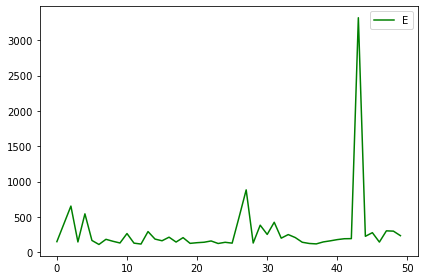

In [8]:
%matplotlib inline
plt.plot(range((len(list_mean_squared_errors))),list_mean_squared_errors,'g')
plt.legend('Errors')
plt.tight_layout()
plt.show()

### Part B: Normalize the data

In [9]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [10]:
normalized_df=(df-df.mean())/df.std()
normalized_df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,0.862735,-1.217079,-0.279597,2.644123
1,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,1.055651,-1.217079,-0.279597,1.560663
2,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,3.551340,0.266498
3,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,5.055221,0.313188
4,-0.790075,0.678079,-0.846733,0.488555,-1.038638,0.070492,0.647569,4.976069,0.507732


In [11]:
X = normalized_df.drop(['Strength'],axis =1)
y=  normalized_df['Strength'].values

In [12]:
list_mean_squared_errors=[ train_oneHiddenLayer(Nodes=10,Epochs=50) for _ in range(50)]
print(list_mean_squared_errors)
print("Mean of the mean squared errors = ", np.mean( np.array(list_mean_squared_errors) ))
print("The standard deviation of the mean squared errors = ", np.std(np.array(list_mean_squared_errors) ))

Epoch 1/50
721/721 [==============================] - 0s 261us/step - loss: 3.0983
Epoch 2/50
721/721 [==============================] - 0s 29us/step - loss: 2.4223
Epoch 3/50
721/721 [==============================] - 0s 36us/step - loss: 1.9451
Epoch 4/50
721/721 [==============================] - 0s 28us/step - loss: 1.6104
Epoch 5/50
721/721 [==============================] - 0s 49us/step - loss: 1.3691
Epoch 6/50
721/721 [==============================] - 0s 26us/step - loss: 1.1980
Epoch 7/50
721/721 [==============================] - 0s 45us/step - loss: 1.0748
Epoch 8/50
721/721 [==============================] - 0s 44us/step - loss: 0.9711
Epoch 9/50
721/721 [==============================] - 0s 32us/step - loss: 0.8919
Epoch 10/50
721/721 [==============================] - 0s 33us/step - loss: 0.8225
Epoch 11/50
721/721 [==============================] - 0s 33us/step - loss: 0.7628
Epoch 12/50
721/721 [==============================] - 0s 38us/step - loss: 0.7137
Epoch 13/50


721/721 [==============================] - 0s 29us/step - loss: 0.1917
Epoch 50/50
721/721 [==============================] - 0s 37us/step - loss: 0.1897
Epoch 1/50
721/721 [==============================] - 0s 274us/step - loss: 1.1318
Epoch 2/50
721/721 [==============================] - 0s 44us/step - loss: 0.9377
Epoch 3/50
721/721 [==============================] - 0s 32us/step - loss: 0.8345
Epoch 4/50
721/721 [==============================] - 0s 30us/step - loss: 0.7635
Epoch 5/50
721/721 [==============================] - 0s 27us/step - loss: 0.7151
Epoch 6/50
721/721 [==============================] - 0s 28us/step - loss: 0.6724
Epoch 7/50
721/721 [==============================] - 0s 33us/step - loss: 0.6380
Epoch 8/50
721/721 [==============================] - 0s 33us/step - loss: 0.6073
Epoch 9/50
721/721 [==============================] - 0s 33us/step - loss: 0.5824
Epoch 10/50
721/721 [==============================] - 0s 27us/step - loss: 0.5595
Epoch 11/50
721/721 [===

721/721 [==============================] - 0s 28us/step - loss: 0.2179
Epoch 49/50
721/721 [==============================] - 0s 28us/step - loss: 0.2155
Epoch 50/50
721/721 [==============================] - 0s 33us/step - loss: 0.2124
Epoch 1/50
721/721 [==============================] - 0s 251us/step - loss: 6.1959
Epoch 2/50
721/721 [==============================] - 0s 33us/step - loss: 4.9921
Epoch 3/50
721/721 [==============================] - 0s 35us/step - loss: 4.0349
Epoch 4/50
721/721 [==============================] - 0s 20us/step - loss: 3.2762
Epoch 5/50
721/721 [==============================] - 0s 37us/step - loss: 2.6828
Epoch 6/50
721/721 [==============================] - 0s 28us/step - loss: 2.2174
Epoch 7/50
721/721 [==============================] - 0s 19us/step - loss: 1.8671
Epoch 8/50
721/721 [==============================] - 0s 30us/step - loss: 1.5891
Epoch 9/50
721/721 [==============================] - 0s 28us/step - loss: 1.3758
Epoch 10/50
721/721 [===

721/721 [==============================] - 0s 28us/step - loss: 0.2278
Epoch 47/50
721/721 [==============================] - 0s 33us/step - loss: 0.2258
Epoch 48/50
721/721 [==============================] - 0s 28us/step - loss: 0.2240
Epoch 49/50
721/721 [==============================] - 0s 28us/step - loss: 0.2214
Epoch 50/50
721/721 [==============================] - 0s 20us/step - loss: 0.2197
Epoch 1/50
721/721 [==============================] - 0s 245us/step - loss: 2.5513
Epoch 2/50
721/721 [==============================] - 0s 40us/step - loss: 2.0861
Epoch 3/50
721/721 [==============================] - 0s 26us/step - loss: 1.7384
Epoch 4/50
721/721 [==============================] - 0s 25us/step - loss: 1.4701
Epoch 5/50
721/721 [==============================] - 0s 29us/step - loss: 1.2757
Epoch 6/50
721/721 [==============================] - 0s 33us/step - loss: 1.1217
Epoch 7/50
721/721 [==============================] - 0s 41us/step - loss: 0.9967
Epoch 8/50
721/721 [==

721/721 [==============================] - 0s 28us/step - loss: 0.1943
Epoch 46/50
721/721 [==============================] - 0s 28us/step - loss: 0.1926
Epoch 47/50
721/721 [==============================] - 0s 28us/step - loss: 0.1903
Epoch 48/50
721/721 [==============================] - 0s 28us/step - loss: 0.1879
Epoch 49/50
721/721 [==============================] - 0s 28us/step - loss: 0.1870
Epoch 50/50
721/721 [==============================] - 0s 28us/step - loss: 0.1849
Epoch 1/50
721/721 [==============================] - 0s 285us/step - loss: 2.3834
Epoch 2/50
721/721 [==============================] - 0s 33us/step - loss: 1.9407
Epoch 3/50
721/721 [==============================] - 0s 36us/step - loss: 1.6034
Epoch 4/50
721/721 [==============================] - 0s 34us/step - loss: 1.3468
Epoch 5/50
721/721 [==============================] - 0s 31us/step - loss: 1.1551
Epoch 6/50
721/721 [==============================] - 0s 24us/step - loss: 1.0001
Epoch 7/50
721/721 [=

721/721 [==============================] - 0s 37us/step - loss: 0.2183
Epoch 45/50
721/721 [==============================] - 0s 30us/step - loss: 0.2161
Epoch 46/50
721/721 [==============================] - 0s 34us/step - loss: 0.2133
Epoch 47/50
721/721 [==============================] - 0s 20us/step - loss: 0.2114
Epoch 48/50
721/721 [==============================] - 0s 32us/step - loss: 0.2095
Epoch 49/50
721/721 [==============================] - 0s 45us/step - loss: 0.2082
Epoch 50/50
721/721 [==============================] - 0s 25us/step - loss: 0.2058
Epoch 1/50
721/721 [==============================] - 0s 257us/step - loss: 1.4025
Epoch 2/50
721/721 [==============================] - 0s 43us/step - loss: 1.2014
Epoch 3/50
721/721 [==============================] - 0s 28us/step - loss: 1.0474
Epoch 4/50
721/721 [==============================] - 0s 28us/step - loss: 0.9282
Epoch 5/50
721/721 [==============================] - 0s 43us/step - loss: 0.8380
Epoch 6/50
721/721 [

721/721 [==============================] - 0s 25us/step - loss: 0.2980
Epoch 43/50
721/721 [==============================] - 0s 37us/step - loss: 0.2931
Epoch 44/50
721/721 [==============================] - 0s 25us/step - loss: 0.2877
Epoch 45/50
721/721 [==============================] - 0s 31us/step - loss: 0.2831
Epoch 46/50
721/721 [==============================] - 0s 24us/step - loss: 0.2785
Epoch 47/50
721/721 [==============================] - 0s 30us/step - loss: 0.2744
Epoch 48/50
721/721 [==============================] - 0s 36us/step - loss: 0.2699
Epoch 49/50
721/721 [==============================] - 0s 25us/step - loss: 0.2660
Epoch 50/50
721/721 [==============================] - 0s 41us/step - loss: 0.2620
Epoch 1/50
721/721 [==============================] - 0s 399us/step - loss: 1.0724
Epoch 2/50
721/721 [==============================] - 0s 21us/step - loss: 0.9143
Epoch 3/50
721/721 [==============================] - 0s 34us/step - loss: 0.7959
Epoch 4/50
721/721

721/721 [==============================] - 0s 28us/step - loss: 0.2514
Epoch 42/50
721/721 [==============================] - 0s 28us/step - loss: 0.2472
Epoch 43/50
721/721 [==============================] - 0s 28us/step - loss: 0.2427
Epoch 44/50
721/721 [==============================] - 0s 33us/step - loss: 0.2387
Epoch 45/50
721/721 [==============================] - 0s 28us/step - loss: 0.2349
Epoch 46/50
721/721 [==============================] - 0s 33us/step - loss: 0.2318
Epoch 47/50
721/721 [==============================] - 0s 28us/step - loss: 0.2274
Epoch 48/50
721/721 [==============================] - 0s 28us/step - loss: 0.2241
Epoch 49/50
721/721 [==============================] - 0s 33us/step - loss: 0.2209
Epoch 50/50
721/721 [==============================] - 0s 28us/step - loss: 0.2182
Epoch 1/50
721/721 [==============================] - 0s 251us/step - loss: 2.1589
Epoch 2/50
721/721 [==============================] - 0s 31us/step - loss: 1.7716
Epoch 3/50
721/72

721/721 [==============================] - 0s 28us/step - loss: 0.2455
Epoch 40/50
721/721 [==============================] - 0s 28us/step - loss: 0.2414
Epoch 41/50
721/721 [==============================] - 0s 28us/step - loss: 0.2372
Epoch 42/50
721/721 [==============================] - 0s 28us/step - loss: 0.2338
Epoch 43/50
721/721 [==============================] - 0s 28us/step - loss: 0.2285
Epoch 44/50
721/721 [==============================] - 0s 28us/step - loss: 0.2248
Epoch 45/50
721/721 [==============================] - 0s 28us/step - loss: 0.2208
Epoch 46/50
721/721 [==============================] - 0s 28us/step - loss: 0.2175
Epoch 47/50
721/721 [==============================] - 0s 33us/step - loss: 0.2138
Epoch 48/50
721/721 [==============================] - 0s 28us/step - loss: 0.2104
Epoch 49/50
721/721 [==============================] - 0s 28us/step - loss: 0.2069
Epoch 50/50
721/721 [==============================] - 0s 28us/step - loss: 0.2043
Epoch 1/50
721/7

721/721 [==============================] - 0s 29us/step - loss: 0.3390
Epoch 39/50
721/721 [==============================] - 0s 27us/step - loss: 0.3351
Epoch 40/50
721/721 [==============================] - 0s 16us/step - loss: 0.3325
Epoch 41/50
721/721 [==============================] - 0s 34us/step - loss: 0.3287
Epoch 42/50
721/721 [==============================] - 0s 24us/step - loss: 0.3250
Epoch 43/50
721/721 [==============================] - 0s 29us/step - loss: 0.3222
Epoch 44/50
721/721 [==============================] - 0s 31us/step - loss: 0.3182
Epoch 45/50
721/721 [==============================] - 0s 31us/step - loss: 0.3159
Epoch 46/50
721/721 [==============================] - 0s 24us/step - loss: 0.3130
Epoch 47/50
721/721 [==============================] - 0s 44us/step - loss: 0.3105
Epoch 48/50
721/721 [==============================] - 0s 28us/step - loss: 0.3080
Epoch 49/50
721/721 [==============================] - 0s 23us/step - loss: 0.3053
Epoch 50/50
721/

721/721 [==============================] - 0s 28us/step - loss: 0.2758
Epoch 38/50
721/721 [==============================] - 0s 30us/step - loss: 0.2712
Epoch 39/50
721/721 [==============================] - 0s 13us/step - loss: 0.2663
Epoch 40/50
721/721 [==============================] - 0s 48us/step - loss: 0.2617
Epoch 41/50
721/721 [==============================] - 0s 16us/step - loss: 0.2581
Epoch 42/50
721/721 [==============================] - 0s 42us/step - loss: 0.2533
Epoch 43/50
721/721 [==============================] - 0s 21us/step - loss: 0.2493
Epoch 44/50
721/721 [==============================] - 0s 40us/step - loss: 0.2448
Epoch 45/50
721/721 [==============================] - 0s 24us/step - loss: 0.2411
Epoch 46/50
721/721 [==============================] - 0s 40us/step - loss: 0.2372
Epoch 47/50
721/721 [==============================] - 0s 21us/step - loss: 0.2336
Epoch 48/50
721/721 [==============================] - 0s 21us/step - loss: 0.2306
Epoch 49/50
721/

721/721 [==============================] - 0s 29us/step - loss: 0.2168
Epoch 36/50
721/721 [==============================] - 0s 14us/step - loss: 0.2150
Epoch 37/50
721/721 [==============================] - 0s 41us/step - loss: 0.2125
Epoch 38/50
721/721 [==============================] - 0s 23us/step - loss: 0.2102
Epoch 39/50
721/721 [==============================] - 0s 26us/step - loss: 0.2074
Epoch 40/50
721/721 [==============================] - 0s 24us/step - loss: 0.2054
Epoch 41/50
721/721 [==============================] - 0s 15us/step - loss: 0.2031
Epoch 42/50
721/721 [==============================] - 0s 41us/step - loss: 0.2012
Epoch 43/50
721/721 [==============================] - 0s 13us/step - loss: 0.1998
Epoch 44/50
721/721 [==============================] - 0s 31us/step - loss: 0.1973
Epoch 45/50
721/721 [==============================] - 0s 36us/step - loss: 0.1957
Epoch 46/50
721/721 [==============================] - 0s 18us/step - loss: 0.1937
Epoch 47/50
721/

721/721 [==============================] - 0s 26us/step - loss: 0.2739
Epoch 34/50
721/721 [==============================] - 0s 26us/step - loss: 0.2683
Epoch 35/50
721/721 [==============================] - 0s 22us/step - loss: 0.2640
Epoch 36/50
721/721 [==============================] - 0s 28us/step - loss: 0.2584
Epoch 37/50
721/721 [==============================] - 0s 20us/step - loss: 0.2539
Epoch 38/50
721/721 [==============================] - 0s 44us/step - loss: 0.2490
Epoch 39/50
721/721 [==============================] - 0s 17us/step - loss: 0.2451
Epoch 40/50
721/721 [==============================] - 0s 30us/step - loss: 0.2408
Epoch 41/50
721/721 [==============================] - 0s 37us/step - loss: 0.2365
Epoch 42/50
721/721 [==============================] - 0s 32us/step - loss: 0.2330
Epoch 43/50
721/721 [==============================] - 0s 24us/step - loss: 0.2292
Epoch 44/50
721/721 [==============================] - 0s 28us/step - loss: 0.2259
Epoch 45/50
721/

721/721 [==============================] - 0s 29us/step - loss: 0.2790
Epoch 33/50
721/721 [==============================] - 0s 31us/step - loss: 0.2731
Epoch 34/50
721/721 [==============================] - 0s 22us/step - loss: 0.2679
Epoch 35/50
721/721 [==============================] - 0s 27us/step - loss: 0.2631
Epoch 36/50
721/721 [==============================] - 0s 42us/step - loss: 0.2582
Epoch 37/50
721/721 [==============================] - 0s 14us/step - loss: 0.2531
Epoch 38/50
721/721 [==============================] - 0s 44us/step - loss: 0.2494
Epoch 39/50
721/721 [==============================] - 0s 18us/step - loss: 0.2443
Epoch 40/50
721/721 [==============================] - 0s 45us/step - loss: 0.2400
Epoch 41/50
721/721 [==============================] - 0s 20us/step - loss: 0.2363
Epoch 42/50
721/721 [==============================] - 0s 38us/step - loss: 0.2331
Epoch 43/50
721/721 [==============================] - 0s 26us/step - loss: 0.2292
Epoch 44/50
721/

721/721 [==============================] - 0s 28us/step - loss: 0.3200
Epoch 31/50
721/721 [==============================] - 0s 22us/step - loss: 0.3151
Epoch 32/50
721/721 [==============================] - 0s 28us/step - loss: 0.3100
Epoch 33/50
721/721 [==============================] - 0s 28us/step - loss: 0.3053
Epoch 34/50
721/721 [==============================] - 0s 22us/step - loss: 0.3006
Epoch 35/50
721/721 [==============================] - 0s 28us/step - loss: 0.2953
Epoch 36/50
721/721 [==============================] - 0s 28us/step - loss: 0.2912
Epoch 37/50
721/721 [==============================] - 0s 28us/step - loss: 0.2855
Epoch 38/50
721/721 [==============================] - 0s 28us/step - loss: 0.2816
Epoch 39/50
721/721 [==============================] - 0s 28us/step - loss: 0.2767
Epoch 40/50
721/721 [==============================] - 0s 28us/step - loss: 0.2718
Epoch 41/50
721/721 [==============================] - 0s 33us/step - loss: 0.2676
Epoch 42/50
721/

721/721 [==============================] - 0s 18us/step - loss: 0.3454
Epoch 29/50
721/721 [==============================] - 0s 37us/step - loss: 0.3378
Epoch 30/50
721/721 [==============================] - 0s 22us/step - loss: 0.3297
Epoch 31/50
721/721 [==============================] - 0s 29us/step - loss: 0.3224
Epoch 32/50
721/721 [==============================] - 0s 29us/step - loss: 0.3148
Epoch 33/50
721/721 [==============================] - 0s 41us/step - loss: 0.3065
Epoch 34/50
721/721 [==============================] - 0s 23us/step - loss: 0.2998
Epoch 35/50
721/721 [==============================] - 0s 28us/step - loss: 0.2926
Epoch 36/50
721/721 [==============================] - 0s 23us/step - loss: 0.2855
Epoch 37/50
721/721 [==============================] - 0s 33us/step - loss: 0.2790
Epoch 38/50
721/721 [==============================] - 0s 39us/step - loss: 0.2720
Epoch 39/50
721/721 [==============================] - 0s 18us/step - loss: 0.2663
Epoch 40/50
721/

721/721 [==============================] - 0s 32us/step - loss: 0.2371
Epoch 28/50
721/721 [==============================] - 0s 23us/step - loss: 0.2324
Epoch 29/50
721/721 [==============================] - 0s 16us/step - loss: 0.2279
Epoch 30/50
721/721 [==============================] - 0s 40us/step - loss: 0.2238
Epoch 31/50
721/721 [==============================] - 0s 36us/step - loss: 0.2201
Epoch 32/50
721/721 [==============================] - 0s 28us/step - loss: 0.2163
Epoch 33/50
721/721 [==============================] - 0s 28us/step - loss: 0.2126
Epoch 34/50
721/721 [==============================] - 0s 28us/step - loss: 0.2091
Epoch 35/50
721/721 [==============================] - 0s 28us/step - loss: 0.2063
Epoch 36/50
721/721 [==============================] - 0s 28us/step - loss: 0.2033
Epoch 37/50
721/721 [==============================] - 0s 33us/step - loss: 0.2007
Epoch 38/50
721/721 [==============================] - 0s 28us/step - loss: 0.1982
Epoch 39/50
721/

721/721 [==============================] - 0s 27us/step - loss: 0.2852
Epoch 27/50
721/721 [==============================] - 0s 37us/step - loss: 0.2806
Epoch 28/50
721/721 [==============================] - 0s 19us/step - loss: 0.2760
Epoch 29/50
721/721 [==============================] - 0s 27us/step - loss: 0.2715
Epoch 30/50
721/721 [==============================] - 0s 34us/step - loss: 0.2668
Epoch 31/50
721/721 [==============================] - 0s 45us/step - loss: 0.2630
Epoch 32/50
721/721 [==============================] - 0s 28us/step - loss: 0.2589
Epoch 33/50
721/721 [==============================] - 0s 34us/step - loss: 0.2551
Epoch 34/50
721/721 [==============================] - 0s 24us/step - loss: 0.2516
Epoch 35/50
721/721 [==============================] - 0s 31us/step - loss: 0.2486
Epoch 36/50
721/721 [==============================] - 0s 36us/step - loss: 0.2445
Epoch 37/50
721/721 [==============================] - 0s 28us/step - loss: 0.2419
Epoch 38/50
721/

721/721 [==============================] - 0s 28us/step - loss: 0.3250
Epoch 26/50
721/721 [==============================] - 0s 30us/step - loss: 0.3172
Epoch 27/50
721/721 [==============================] - 0s 17us/step - loss: 0.3092
Epoch 28/50
721/721 [==============================] - 0s 32us/step - loss: 0.3017
Epoch 29/50
721/721 [==============================] - 0s 30us/step - loss: 0.2938
Epoch 30/50
721/721 [==============================] - 0s 28us/step - loss: 0.2863
Epoch 31/50
721/721 [==============================] - 0s 32us/step - loss: 0.2785
Epoch 32/50
721/721 [==============================] - 0s 40us/step - loss: 0.2716
Epoch 33/50
721/721 [==============================] - 0s 24us/step - loss: 0.2641
Epoch 34/50
721/721 [==============================] - 0s 30us/step - loss: 0.2574
Epoch 35/50
721/721 [==============================] - 0s 27us/step - loss: 0.2507
Epoch 36/50
721/721 [==============================] - 0s 34us/step - loss: 0.2432
Epoch 37/50
721/

721/721 [==============================] - 0s 28us/step - loss: 0.5615
Epoch 24/50
721/721 [==============================] - 0s 32us/step - loss: 0.5480
Epoch 25/50
721/721 [==============================] - 0s 27us/step - loss: 0.5354
Epoch 26/50
721/721 [==============================] - 0s 28us/step - loss: 0.5233
Epoch 27/50
721/721 [==============================] - 0s 20us/step - loss: 0.5111
Epoch 28/50
721/721 [==============================] - 0s 35us/step - loss: 0.4988
Epoch 29/50
721/721 [==============================] - 0s 32us/step - loss: 0.4871
Epoch 30/50
721/721 [==============================] - 0s 34us/step - loss: 0.4765
Epoch 31/50
721/721 [==============================] - 0s 25us/step - loss: 0.4648
Epoch 32/50
721/721 [==============================] - 0s 40us/step - loss: 0.4538
Epoch 33/50
721/721 [==============================] - 0s 30us/step - loss: 0.4444
Epoch 34/50
721/721 [==============================] - 0s 32us/step - loss: 0.4365
Epoch 35/50
721/

721/721 [==============================] - 0s 28us/step - loss: 0.3559
Epoch 22/50
721/721 [==============================] - 0s 28us/step - loss: 0.3487
Epoch 23/50
721/721 [==============================] - 0s 33us/step - loss: 0.3412
Epoch 24/50
721/721 [==============================] - 0s 33us/step - loss: 0.3345
Epoch 25/50
721/721 [==============================] - 0s 28us/step - loss: 0.3281
Epoch 26/50
721/721 [==============================] - 0s 22us/step - loss: 0.3215
Epoch 27/50
721/721 [==============================] - 0s 34us/step - loss: 0.3141
Epoch 28/50
721/721 [==============================] - 0s 27us/step - loss: 0.3078
Epoch 29/50
721/721 [==============================] - 0s 32us/step - loss: 0.2996
Epoch 30/50
721/721 [==============================] - 0s 32us/step - loss: 0.2921
Epoch 31/50
721/721 [==============================] - 0s 41us/step - loss: 0.2851
Epoch 32/50
721/721 [==============================] - 0s 25us/step - loss: 0.2787
Epoch 33/50
721/

721/721 [==============================] - 0s 29us/step - loss: 0.3823
Epoch 21/50
721/721 [==============================] - 0s 22us/step - loss: 0.3741
Epoch 22/50
721/721 [==============================] - 0s 22us/step - loss: 0.3658
Epoch 23/50
721/721 [==============================] - 0s 26us/step - loss: 0.3594
Epoch 24/50
721/721 [==============================] - 0s 33us/step - loss: 0.3525
Epoch 25/50
721/721 [==============================] - 0s 28us/step - loss: 0.3474
Epoch 26/50
721/721 [==============================] - 0s 28us/step - loss: 0.3410
Epoch 27/50
721/721 [==============================] - 0s 30us/step - loss: 0.3330
Epoch 28/50
721/721 [==============================] - 0s 22us/step - loss: 0.3277
Epoch 29/50
721/721 [==============================] - 0s 39us/step - loss: 0.3216
Epoch 30/50
721/721 [==============================] - 0s 25us/step - loss: 0.3166
Epoch 31/50
721/721 [==============================] - 0s 36us/step - loss: 0.3110
Epoch 32/50
721/

721/721 [==============================] - 0s 26us/step - loss: 0.3111
Epoch 20/50
721/721 [==============================] - 0s 31us/step - loss: 0.3023
Epoch 21/50
721/721 [==============================] - 0s 28us/step - loss: 0.2938
Epoch 22/50
721/721 [==============================] - 0s 28us/step - loss: 0.2858
Epoch 23/50
721/721 [==============================] - 0s 28us/step - loss: 0.2789
Epoch 24/50
721/721 [==============================] - 0s 28us/step - loss: 0.2717
Epoch 25/50
721/721 [==============================] - 0s 33us/step - loss: 0.2651
Epoch 26/50
721/721 [==============================] - 0s 28us/step - loss: 0.2591
Epoch 27/50
721/721 [==============================] - 0s 22us/step - loss: 0.2529
Epoch 28/50
721/721 [==============================] - 0s 28us/step - loss: 0.2476
Epoch 29/50
721/721 [==============================] - 0s 28us/step - loss: 0.2429
Epoch 30/50
721/721 [==============================] - 0s 22us/step - loss: 0.2375
Epoch 31/50
721/

721/721 [==============================] - 0s 27us/step - loss: 0.3162
Epoch 18/50
721/721 [==============================] - 0s 18us/step - loss: 0.3089
Epoch 19/50
721/721 [==============================] - 0s 40us/step - loss: 0.3019
Epoch 20/50
721/721 [==============================] - 0s 30us/step - loss: 0.2953
Epoch 21/50
721/721 [==============================] - 0s 18us/step - loss: 0.2894
Epoch 22/50
721/721 [==============================] - 0s 28us/step - loss: 0.2835
Epoch 23/50
721/721 [==============================] - 0s 27us/step - loss: 0.2780
Epoch 24/50
721/721 [==============================] - 0s 29us/step - loss: 0.2726
Epoch 25/50
721/721 [==============================] - 0s 41us/step - loss: 0.2676
Epoch 26/50
721/721 [==============================] - 0s 20us/step - loss: 0.2627
Epoch 27/50
721/721 [==============================] - 0s 27us/step - loss: 0.2585
Epoch 28/50
721/721 [==============================] - 0s 31us/step - loss: 0.2539
Epoch 29/50
721/

721/721 [==============================] - 0s 34us/step - loss: 0.3199
Epoch 16/50
721/721 [==============================] - 0s 27us/step - loss: 0.3112
Epoch 17/50
721/721 [==============================] - 0s 13us/step - loss: 0.3036
Epoch 18/50
721/721 [==============================] - 0s 39us/step - loss: 0.2957
Epoch 19/50
721/721 [==============================] - 0s 30us/step - loss: 0.2891
Epoch 20/50
721/721 [==============================] - 0s 30us/step - loss: 0.2817
Epoch 21/50
721/721 [==============================] - 0s 31us/step - loss: 0.2757
Epoch 22/50
721/721 [==============================] - 0s 31us/step - loss: 0.2698
Epoch 23/50
721/721 [==============================] - 0s 48us/step - loss: 0.2639
Epoch 24/50
721/721 [==============================] - 0s 18us/step - loss: 0.2591
Epoch 25/50
721/721 [==============================] - 0s 30us/step - loss: 0.2532
Epoch 26/50
721/721 [==============================] - 0s 33us/step - loss: 0.2484
Epoch 27/50
721/

721/721 [==============================] - 0s 28us/step - loss: 0.4893
Epoch 14/50
721/721 [==============================] - 0s 28us/step - loss: 0.4758
Epoch 15/50
721/721 [==============================] - 0s 28us/step - loss: 0.4638
Epoch 16/50
721/721 [==============================] - 0s 28us/step - loss: 0.4546
Epoch 17/50
721/721 [==============================] - 0s 39us/step - loss: 0.4460
Epoch 18/50
721/721 [==============================] - 0s 33us/step - loss: 0.4386
Epoch 19/50
721/721 [==============================] - 0s 28us/step - loss: 0.4328
Epoch 20/50
721/721 [==============================] - 0s 28us/step - loss: 0.4268
Epoch 21/50
721/721 [==============================] - 0s 22us/step - loss: 0.4215
Epoch 22/50
721/721 [==============================] - 0s 36us/step - loss: 0.4162
Epoch 23/50
721/721 [==============================] - 0s 24us/step - loss: 0.4121
Epoch 24/50
721/721 [==============================] - 0s 42us/step - loss: 0.4080
Epoch 25/50
721/

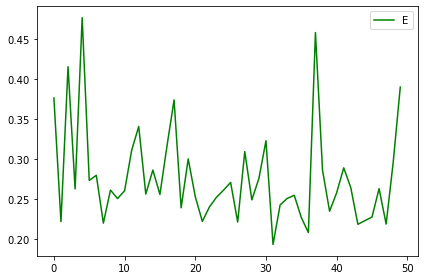

In [13]:
%matplotlib inline
plt.plot(range((len(list_mean_squared_errors))),list_mean_squared_errors,'g')
plt.legend('Errors')
plt.tight_layout()
plt.show()

### Part C: Increate the number of epochs

In [14]:
list_mean_squared_errors=[ train_oneHiddenLayer(Nodes=10,Epochs=100) for _ in range(50)]
print(list_mean_squared_errors)
print("Mean of the mean squared errors = ", np.mean( np.array(list_mean_squared_errors) ))
print("The standard deviation of the mean squared errors = ", np.std(np.array(list_mean_squared_errors) ))

Epoch 1/100
721/721 [==============================] - 0s 298us/step - loss: 1.4306
Epoch 2/100
721/721 [==============================] - 0s 28us/step - loss: 1.1928
Epoch 3/100
721/721 [==============================] - 0s 28us/step - loss: 1.0137
Epoch 4/100
721/721 [==============================] - 0s 33us/step - loss: 0.8647
Epoch 5/100
721/721 [==============================] - 0s 24us/step - loss: 0.7518
Epoch 6/100
721/721 [==============================] - 0s 48us/step - loss: 0.6613
Epoch 7/100
721/721 [==============================] - 0s 35us/step - loss: 0.5907
Epoch 8/100
721/721 [==============================] - 0s 50us/step - loss: 0.5398
Epoch 9/100
721/721 [==============================] - 0s 32us/step - loss: 0.5010
Epoch 10/100
721/721 [==============================] - 0s 35us/step - loss: 0.4728
Epoch 11/100
721/721 [==============================] - 0s 37us/step - loss: 0.4500
Epoch 12/100
721/721 [==============================] - 0s 33us/step - loss: 0.4328


721/721 [==============================] - 0s 28us/step - loss: 0.1594
Epoch 99/100
721/721 [==============================] - 0s 33us/step - loss: 0.1591
Epoch 100/100
721/721 [==============================] - 0s 13us/step - loss: 0.1586
Epoch 1/100
721/721 [==============================] - 0s 271us/step - loss: 2.4049
Epoch 2/100
721/721 [==============================] - 0s 30us/step - loss: 1.8853
Epoch 3/100
721/721 [==============================] - 0s 38us/step - loss: 1.5039
Epoch 4/100
721/721 [==============================] - 0s 22us/step - loss: 1.2301
Epoch 5/100
721/721 [==============================] - 0s 34us/step - loss: 1.0293
Epoch 6/100
721/721 [==============================] - 0s 39us/step - loss: 0.8857
Epoch 7/100
721/721 [==============================] - 0s 28us/step - loss: 0.7784
Epoch 8/100
721/721 [==============================] - 0s 31us/step - loss: 0.6941
Epoch 9/100
721/721 [==============================] - 0s 30us/step - loss: 0.6320
Epoch 10/100

721/721 [==============================] - 0s 28us/step - loss: 0.1587
Epoch 96/100
721/721 [==============================] - 0s 29us/step - loss: 0.1582
Epoch 97/100
721/721 [==============================] - 0s 28us/step - loss: 0.1572
Epoch 98/100
721/721 [==============================] - 0s 19us/step - loss: 0.1564
Epoch 99/100
721/721 [==============================] - 0s 36us/step - loss: 0.1559
Epoch 100/100
721/721 [==============================] - 0s 36us/step - loss: 0.1550
Epoch 1/100
721/721 [==============================] - 0s 252us/step - loss: 0.8322
Epoch 2/100
721/721 [==============================] - 0s 17us/step - loss: 0.7028
Epoch 3/100
721/721 [==============================] - 0s 37us/step - loss: 0.6165
Epoch 4/100
721/721 [==============================] - 0s 37us/step - loss: 0.5589
Epoch 5/100
721/721 [==============================] - 0s 29us/step - loss: 0.5154
Epoch 6/100
721/721 [==============================] - 0s 26us/step - loss: 0.4818
Epoch 7/1

721/721 [==============================] - 0s 35us/step - loss: 0.1470
Epoch 93/100
721/721 [==============================] - 0s 28us/step - loss: 0.1463
Epoch 94/100
721/721 [==============================] - 0s 17us/step - loss: 0.1456
Epoch 95/100
721/721 [==============================] - 0s 39us/step - loss: 0.1452
Epoch 96/100
721/721 [==============================] - 0s 33us/step - loss: 0.1443
Epoch 97/100
721/721 [==============================] - 0s 33us/step - loss: 0.1439
Epoch 98/100
721/721 [==============================] - 0s 21us/step - loss: 0.1432
Epoch 99/100
721/721 [==============================] - 0s 35us/step - loss: 0.1423
Epoch 100/100
721/721 [==============================] - 0s 43us/step - loss: 0.1419
Epoch 1/100
721/721 [==============================] - 0s 270us/step - loss: 1.0491
Epoch 2/100
721/721 [==============================] - 0s 16us/step - loss: 0.8240
Epoch 3/100
721/721 [==============================] - 0s 40us/step - loss: 0.6997
Epoch 

721/721 [==============================] - 0s 28us/step - loss: 0.1552
Epoch 90/100
721/721 [==============================] - 0s 29us/step - loss: 0.1546
Epoch 91/100
721/721 [==============================] - 0s 18us/step - loss: 0.1541
Epoch 92/100
721/721 [==============================] - 0s 36us/step - loss: 0.1528
Epoch 93/100
721/721 [==============================] - 0s 27us/step - loss: 0.1535
Epoch 94/100
721/721 [==============================] - 0s 35us/step - loss: 0.1526
Epoch 95/100
721/721 [==============================] - 0s 40us/step - loss: 0.1510
Epoch 96/100
721/721 [==============================] - 0s 28us/step - loss: 0.1508
Epoch 97/100
721/721 [==============================] - 0s 28us/step - loss: 0.1507
Epoch 98/100
721/721 [==============================] - 0s 20us/step - loss: 0.1498
Epoch 99/100
721/721 [==============================] - 0s 42us/step - loss: 0.1495
Epoch 100/100
721/721 [==============================] - 0s 24us/step - loss: 0.1487
Epoc

721/721 [==============================] - 0s 28us/step - loss: 0.1935
Epoch 87/100
721/721 [==============================] - 0s 33us/step - loss: 0.1922
Epoch 88/100
721/721 [==============================] - 0s 28us/step - loss: 0.1901
Epoch 89/100
721/721 [==============================] - 0s 28us/step - loss: 0.1892
Epoch 90/100
721/721 [==============================] - 0s 28us/step - loss: 0.1880
Epoch 91/100
721/721 [==============================] - 0s 28us/step - loss: 0.1873
Epoch 92/100
721/721 [==============================] - 0s 28us/step - loss: 0.1861
Epoch 93/100
721/721 [==============================] - 0s 33us/step - loss: 0.1846
Epoch 94/100
721/721 [==============================] - 0s 28us/step - loss: 0.1832
Epoch 95/100
721/721 [==============================] - 0s 33us/step - loss: 0.1822
Epoch 96/100
721/721 [==============================] - 0s 28us/step - loss: 0.1812
Epoch 97/100
721/721 [==============================] - 0s 17us/step - loss: 0.1812
Epoch

721/721 [==============================] - 0s 31us/step - loss: 0.1505
Epoch 84/100
721/721 [==============================] - 0s 14us/step - loss: 0.1496
Epoch 85/100
721/721 [==============================] - 0s 42us/step - loss: 0.1492
Epoch 86/100
721/721 [==============================] - 0s 12us/step - loss: 0.1487
Epoch 87/100
721/721 [==============================] - 0s 34us/step - loss: 0.1479
Epoch 88/100
721/721 [==============================] - 0s 42us/step - loss: 0.1475
Epoch 89/100
721/721 [==============================] - 0s 28us/step - loss: 0.1463
Epoch 90/100
721/721 [==============================] - 0s 28us/step - loss: 0.1456
Epoch 91/100
721/721 [==============================] - 0s 33us/step - loss: 0.1449
Epoch 92/100
721/721 [==============================] - 0s 28us/step - loss: 0.1444
Epoch 93/100
721/721 [==============================] - 0s 28us/step - loss: 0.1444
Epoch 94/100
721/721 [==============================] - 0s 28us/step - loss: 0.1432
Epoch

721/721 [==============================] - 0s 28us/step - loss: 0.1544
Epoch 81/100
721/721 [==============================] - 0s 33us/step - loss: 0.1528
Epoch 82/100
721/721 [==============================] - 0s 12us/step - loss: 0.1527
Epoch 83/100
721/721 [==============================] - 0s 32us/step - loss: 0.1524
Epoch 84/100
721/721 [==============================] - 0s 34us/step - loss: 0.1518
Epoch 85/100
721/721 [==============================] - 0s 30us/step - loss: 0.1507
Epoch 86/100
721/721 [==============================] - 0s 32us/step - loss: 0.1503
Epoch 87/100
721/721 [==============================] - 0s 42us/step - loss: 0.1498
Epoch 88/100
721/721 [==============================] - 0s 24us/step - loss: 0.1495
Epoch 89/100
721/721 [==============================] - 0s 36us/step - loss: 0.1492
Epoch 90/100
721/721 [==============================] - 0s 30us/step - loss: 0.1483
Epoch 91/100
721/721 [==============================] - 0s 42us/step - loss: 0.1481
Epoch

721/721 [==============================] - 0s 35us/step - loss: 0.1710
Epoch 78/100
721/721 [==============================] - 0s 29us/step - loss: 0.1698
Epoch 79/100
721/721 [==============================] - 0s 7us/step - loss: 0.1687
Epoch 80/100
721/721 [==============================] - 0s 36us/step - loss: 0.1681
Epoch 81/100
721/721 [==============================] - 0s 31us/step - loss: 0.1669
Epoch 82/100
721/721 [==============================] - 0s 30us/step - loss: 0.1659
Epoch 83/100
721/721 [==============================] - 0s 43us/step - loss: 0.1653
Epoch 84/100
721/721 [==============================] - 0s 22us/step - loss: 0.1644
Epoch 85/100
721/721 [==============================] - 0s 38us/step - loss: 0.1635
Epoch 86/100
721/721 [==============================] - 0s 36us/step - loss: 0.1625
Epoch 87/100
721/721 [==============================] - 0s 27us/step - loss: 0.1617
Epoch 88/100
721/721 [==============================] - 0s 18us/step - loss: 0.1608
Epoch 

721/721 [==============================] - 0s 25us/step - loss: 0.1821
Epoch 75/100
721/721 [==============================] - 0s 35us/step - loss: 0.1807
Epoch 76/100
721/721 [==============================] - 0s 21us/step - loss: 0.1788
Epoch 77/100
721/721 [==============================] - 0s 26us/step - loss: 0.1776
Epoch 78/100
721/721 [==============================] - 0s 37us/step - loss: 0.1762
Epoch 79/100
721/721 [==============================] - 0s 20us/step - loss: 0.1747
Epoch 80/100
721/721 [==============================] - 0s 46us/step - loss: 0.1732
Epoch 81/100
721/721 [==============================] - 0s 57us/step - loss: 0.1717
Epoch 82/100
721/721 [==============================] - 0s 14us/step - loss: 0.1704
Epoch 83/100
721/721 [==============================] - 0s 35us/step - loss: 0.1692
Epoch 84/100
721/721 [==============================] - 0s 29us/step - loss: 0.1683
Epoch 85/100
721/721 [==============================] - 0s 44us/step - loss: 0.1665
Epoch

721/721 [==============================] - 0s 34us/step - loss: 0.1506
Epoch 72/100
721/721 [==============================] - 0s 28us/step - loss: 0.1502
Epoch 73/100
721/721 [==============================] - 0s 16us/step - loss: 0.1489
Epoch 74/100
721/721 [==============================] - 0s 34us/step - loss: 0.1483
Epoch 75/100
721/721 [==============================] - 0s 25us/step - loss: 0.1476
Epoch 76/100
721/721 [==============================] - 0s 33us/step - loss: 0.1475
Epoch 77/100
721/721 [==============================] - 0s 41us/step - loss: 0.1468
Epoch 78/100
721/721 [==============================] - 0s 25us/step - loss: 0.1465
Epoch 79/100
721/721 [==============================] - 0s 25us/step - loss: 0.1452
Epoch 80/100
721/721 [==============================] - 0s 33us/step - loss: 0.1453
Epoch 81/100
721/721 [==============================] - 0s 41us/step - loss: 0.1448
Epoch 82/100
721/721 [==============================] - 0s 22us/step - loss: 0.1442
Epoch

721/721 [==============================] - 0s 30us/step - loss: 0.1920
Epoch 69/100
721/721 [==============================] - 0s 32us/step - loss: 0.1914
Epoch 70/100
721/721 [==============================] - 0s 12us/step - loss: 0.1906
Epoch 71/100
721/721 [==============================] - 0s 50us/step - loss: 0.1903
Epoch 72/100
721/721 [==============================] - 0s 14us/step - loss: 0.1888
Epoch 73/100
721/721 [==============================] - 0s 34us/step - loss: 0.1877
Epoch 74/100
721/721 [==============================] - 0s 27us/step - loss: 0.1879
Epoch 75/100
721/721 [==============================] - 0s 31us/step - loss: 0.1864
Epoch 76/100
721/721 [==============================] - 0s 31us/step - loss: 0.1882
Epoch 77/100
721/721 [==============================] - 0s 32us/step - loss: 0.1849
Epoch 78/100
721/721 [==============================] - 0s 21us/step - loss: 0.1855
Epoch 79/100
721/721 [==============================] - 0s 38us/step - loss: 0.1837
Epoch

721/721 [==============================] - 0s 35us/step - loss: 0.1534
Epoch 66/100
721/721 [==============================] - 0s 29us/step - loss: 0.1521
Epoch 67/100
721/721 [==============================] - 0s 26us/step - loss: 0.1512
Epoch 68/100
721/721 [==============================] - 0s 19us/step - loss: 0.1505
Epoch 69/100
721/721 [==============================] - 0s 18us/step - loss: 0.1498
Epoch 70/100
721/721 [==============================] - 0s 37us/step - loss: 0.1486
Epoch 71/100
721/721 [==============================] - 0s 18us/step - loss: 0.1476
Epoch 72/100
721/721 [==============================] - 0s 39us/step - loss: 0.1475
Epoch 73/100
721/721 [==============================] - 0s 26us/step - loss: 0.1470
Epoch 74/100
721/721 [==============================] - 0s 39us/step - loss: 0.1455
Epoch 75/100
721/721 [==============================] - 0s 28us/step - loss: 0.1450
Epoch 76/100
721/721 [==============================] - ETA: 0s - loss: 0.172 - 0s 28us/s

721/721 [==============================] - 0s 28us/step - loss: 0.2082
Epoch 63/100
721/721 [==============================] - 0s 28us/step - loss: 0.2069
Epoch 64/100
721/721 [==============================] - 0s 28us/step - loss: 0.2054
Epoch 65/100
721/721 [==============================] - 0s 19us/step - loss: 0.2042
Epoch 66/100
721/721 [==============================] - 0s 30us/step - loss: 0.2025
Epoch 67/100
721/721 [==============================] - 0s 25us/step - loss: 0.2013
Epoch 68/100
721/721 [==============================] - 0s 43us/step - loss: 0.2003
Epoch 69/100
721/721 [==============================] - 0s 16us/step - loss: 0.1991
Epoch 70/100
721/721 [==============================] - 0s 43us/step - loss: 0.1971
Epoch 71/100
721/721 [==============================] - 0s 23us/step - loss: 0.1950
Epoch 72/100
721/721 [==============================] - 0s 40us/step - loss: 0.1941
Epoch 73/100
721/721 [==============================] - 0s 22us/step - loss: 0.1920
Epoch

721/721 [==============================] - 0s 28us/step - loss: 0.1937
Epoch 60/100
721/721 [==============================] - 0s 24us/step - loss: 0.1908
Epoch 61/100
721/721 [==============================] - 0s 28us/step - loss: 0.1891
Epoch 62/100
721/721 [==============================] - 0s 18us/step - loss: 0.1857
Epoch 63/100
721/721 [==============================] - 0s 50us/step - loss: 0.1826
Epoch 64/100
721/721 [==============================] - 0s 18us/step - loss: 0.1806
Epoch 65/100
721/721 [==============================] - 0s 39us/step - loss: 0.1782
Epoch 66/100
721/721 [==============================] - 0s 23us/step - loss: 0.1768
Epoch 67/100
721/721 [==============================] - 0s 40us/step - loss: 0.1741
Epoch 68/100
721/721 [==============================] - 0s 20us/step - loss: 0.1720
Epoch 69/100
721/721 [==============================] - 0s 42us/step - loss: 0.1702
Epoch 70/100
721/721 [==============================] - 0s 17us/step - loss: 0.1684
Epoch

721/721 [==============================] - 0s 30us/step - loss: 0.2105
Epoch 57/100
721/721 [==============================] - 0s 35us/step - loss: 0.2078
Epoch 58/100
721/721 [==============================] - 0s 31us/step - loss: 0.2061
Epoch 59/100
721/721 [==============================] - 0s 21us/step - loss: 0.2045
Epoch 60/100
721/721 [==============================] - 0s 27us/step - loss: 0.2026
Epoch 61/100
721/721 [==============================] - 0s 39us/step - loss: 0.2012
Epoch 62/100
721/721 [==============================] - 0s 38us/step - loss: 0.1996
Epoch 63/100
721/721 [==============================] - 0s 20us/step - loss: 0.1979
Epoch 64/100
721/721 [==============================] - 0s 17us/step - loss: 0.1965
Epoch 65/100
721/721 [==============================] - 0s 38us/step - loss: 0.1954
Epoch 66/100
721/721 [==============================] - 0s 25us/step - loss: 0.1932
Epoch 67/100
721/721 [==============================] - 0s 32us/step - loss: 0.1918
Epoch

721/721 [==============================] - 0s 28us/step - loss: 0.2205
Epoch 54/100
721/721 [==============================] - 0s 22us/step - loss: 0.2185
Epoch 55/100
721/721 [==============================] - 0s 23us/step - loss: 0.2160
Epoch 56/100
721/721 [==============================] - 0s 26us/step - loss: 0.2134
Epoch 57/100
721/721 [==============================] - 0s 35us/step - loss: 0.2111
Epoch 58/100
721/721 [==============================] - 0s 40us/step - loss: 0.2089
Epoch 59/100
721/721 [==============================] - 0s 28us/step - loss: 0.2073
Epoch 60/100
721/721 [==============================] - 0s 26us/step - loss: 0.2052
Epoch 61/100
721/721 [==============================] - 0s 46us/step - loss: 0.2025
Epoch 62/100
721/721 [==============================] - 0s 26us/step - loss: 0.2017
Epoch 63/100
721/721 [==============================] - 0s 24us/step - loss: 0.1996
Epoch 64/100
721/721 [==============================] - 0s 44us/step - loss: 0.1986
Epoch

721/721 [==============================] - 0s 28us/step - loss: 0.2913
Epoch 51/100
721/721 [==============================] - 0s 28us/step - loss: 0.2878
Epoch 52/100
721/721 [==============================] - 0s 28us/step - loss: 0.2841
Epoch 53/100
721/721 [==============================] - 0s 28us/step - loss: 0.2800
Epoch 54/100
721/721 [==============================] - 0s 28us/step - loss: 0.2772
Epoch 55/100
721/721 [==============================] - 0s 22us/step - loss: 0.2736
Epoch 56/100
721/721 [==============================] - 0s 33us/step - loss: 0.2698
Epoch 57/100
721/721 [==============================] - 0s 28us/step - loss: 0.2675
Epoch 58/100
721/721 [==============================] - 0s 28us/step - loss: 0.2648
Epoch 59/100
721/721 [==============================] - 0s 28us/step - loss: 0.2628
Epoch 60/100
721/721 [==============================] - 0s 28us/step - loss: 0.2596
Epoch 61/100
721/721 [==============================] - 0s 29us/step - loss: 0.2576
Epoch

721/721 [==============================] - 0s 28us/step - loss: 0.2397
Epoch 48/100
721/721 [==============================] - 0s 36us/step - loss: 0.2363
Epoch 49/100
721/721 [==============================] - 0s 14us/step - loss: 0.2329
Epoch 50/100
721/721 [==============================] - 0s 24us/step - loss: 0.2300
Epoch 51/100
721/721 [==============================] - 0s 27us/step - loss: 0.2278
Epoch 52/100
721/721 [==============================] - 0s 31us/step - loss: 0.2236
Epoch 53/100
721/721 [==============================] - 0s 35us/step - loss: 0.2208
Epoch 54/100
721/721 [==============================] - 0s 37us/step - loss: 0.2178
Epoch 55/100
721/721 [==============================] - 0s 38us/step - loss: 0.2150
Epoch 56/100
721/721 [==============================] - 0s 35us/step - loss: 0.2121
Epoch 57/100
721/721 [==============================] - 0s 24us/step - loss: 0.2094
Epoch 58/100
721/721 [==============================] - 0s 34us/step - loss: 0.2073
Epoch

721/721 [==============================] - 0s 51us/step - loss: 0.3688
Epoch 45/100
721/721 [==============================] - 0s 33us/step - loss: 0.3620
Epoch 46/100
721/721 [==============================] - 0s 25us/step - loss: 0.3550
Epoch 47/100
721/721 [==============================] - 0s 32us/step - loss: 0.3482
Epoch 48/100
721/721 [==============================] - 0s 28us/step - loss: 0.3399
Epoch 49/100
721/721 [==============================] - 0s 32us/step - loss: 0.3335
Epoch 50/100
721/721 [==============================] - 0s 39us/step - loss: 0.3260
Epoch 51/100
721/721 [==============================] - 0s 22us/step - loss: 0.3186
Epoch 52/100
721/721 [==============================] - 0s 39us/step - loss: 0.3129
Epoch 53/100
721/721 [==============================] - 0s 18us/step - loss: 0.3057
Epoch 54/100
721/721 [==============================] - 0s 41us/step - loss: 0.2996
Epoch 55/100
721/721 [==============================] - 0s 24us/step - loss: 0.2935
Epoch

721/721 [==============================] - 0s 29us/step - loss: 0.2455
Epoch 42/100
721/721 [==============================] - 0s 33us/step - loss: 0.2426
Epoch 43/100
721/721 [==============================] - 0s 13us/step - loss: 0.2396
Epoch 44/100
721/721 [==============================] - 0s 51us/step - loss: 0.2366
Epoch 45/100
721/721 [==============================] - 0s 15us/step - loss: 0.2332
Epoch 46/100
721/721 [==============================] - 0s 44us/step - loss: 0.2304
Epoch 47/100
721/721 [==============================] - 0s 23us/step - loss: 0.2271
Epoch 48/100
721/721 [==============================] - 0s 31us/step - loss: 0.2246
Epoch 49/100
721/721 [==============================] - 0s 32us/step - loss: 0.2215
Epoch 50/100
721/721 [==============================] - 0s 30us/step - loss: 0.2188
Epoch 51/100
721/721 [==============================] - 0s 39us/step - loss: 0.2155
Epoch 52/100
721/721 [==============================] - 0s 17us/step - loss: 0.2138
Epoch

721/721 [==============================] - 0s 43us/step - loss: 0.3162
Epoch 39/100
721/721 [==============================] - 0s 33us/step - loss: 0.3111
Epoch 40/100
721/721 [==============================] - 0s 18us/step - loss: 0.3069
Epoch 41/100
721/721 [==============================] - 0s 31us/step - loss: 0.3013
Epoch 42/100
721/721 [==============================] - 0s 27us/step - loss: 0.2970
Epoch 43/100
721/721 [==============================] - 0s 45us/step - loss: 0.2923
Epoch 44/100
721/721 [==============================] - 0s 25us/step - loss: 0.2880
Epoch 45/100
721/721 [==============================] - 0s 26us/step - loss: 0.2837
Epoch 46/100
721/721 [==============================] - 0s 32us/step - loss: 0.2794
Epoch 47/100
721/721 [==============================] - 0s 25us/step - loss: 0.2759
Epoch 48/100
721/721 [==============================] - 0s 36us/step - loss: 0.2723
Epoch 49/100
721/721 [==============================] - 0s 28us/step - loss: 0.2684
Epoch

721/721 [==============================] - 0s 32us/step - loss: 0.2729
Epoch 36/100
721/721 [==============================] - 0s 12us/step - loss: 0.2672
Epoch 37/100
721/721 [==============================] - 0s 38us/step - loss: 0.2630
Epoch 38/100
721/721 [==============================] - 0s 28us/step - loss: 0.2578
Epoch 39/100
721/721 [==============================] - 0s 36us/step - loss: 0.2533
Epoch 40/100
721/721 [==============================] - 0s 46us/step - loss: 0.2496
Epoch 41/100
721/721 [==============================] - 0s 20us/step - loss: 0.2442
Epoch 42/100
721/721 [==============================] - 0s 43us/step - loss: 0.2412
Epoch 43/100
721/721 [==============================] - 0s 23us/step - loss: 0.2371
Epoch 44/100
721/721 [==============================] - 0s 37us/step - loss: 0.2338
Epoch 45/100
721/721 [==============================] - 0s 29us/step - loss: 0.2303
Epoch 46/100
721/721 [==============================] - 0s 35us/step - loss: 0.2277
Epoch

721/721 [==============================] - 0s 31us/step - loss: 0.3975
Epoch 33/100
721/721 [==============================] - 0s 34us/step - loss: 0.3928
Epoch 34/100
721/721 [==============================] - 0s 15us/step - loss: 0.3889
Epoch 35/100
721/721 [==============================] - 0s 33us/step - loss: 0.3847
Epoch 36/100
721/721 [==============================] - 0s 35us/step - loss: 0.3808
Epoch 37/100
721/721 [==============================] - 0s 25us/step - loss: 0.3763
Epoch 38/100
721/721 [==============================] - 0s 45us/step - loss: 0.3721
Epoch 39/100
721/721 [==============================] - 0s 19us/step - loss: 0.3682
Epoch 40/100
721/721 [==============================] - 0s 32us/step - loss: 0.3638
Epoch 41/100
721/721 [==============================] - 0s 45us/step - loss: 0.3599
Epoch 42/100
721/721 [==============================] - 0s 19us/step - loss: 0.3557
Epoch 43/100
721/721 [==============================] - 0s 36us/step - loss: 0.3517
Epoch

721/721 [==============================] - 0s 32us/step - loss: 0.2523
Epoch 30/100
721/721 [==============================] - 0s 32us/step - loss: 0.2475
Epoch 31/100
721/721 [==============================] - 0s 28us/step - loss: 0.2426
Epoch 32/100
721/721 [==============================] - 0s 21us/step - loss: 0.2387
Epoch 33/100
721/721 [==============================] - 0s 47us/step - loss: 0.2337
Epoch 34/100
721/721 [==============================] - 0s 23us/step - loss: 0.2298
Epoch 35/100
721/721 [==============================] - 0s 33us/step - loss: 0.2259
Epoch 36/100
721/721 [==============================] - 0s 25us/step - loss: 0.2228
Epoch 37/100
721/721 [==============================] - 0s 40us/step - loss: 0.2197
Epoch 38/100
721/721 [==============================] - 0s 22us/step - loss: 0.2163
Epoch 39/100
721/721 [==============================] - 0s 33us/step - loss: 0.2121
Epoch 40/100
721/721 [==============================] - 0s 43us/step - loss: 0.2095
Epoch

721/721 [==============================] - 0s 33us/step - loss: 0.3786
Epoch 27/100
721/721 [==============================] - 0s 28us/step - loss: 0.3723
Epoch 28/100
721/721 [==============================] - 0s 19us/step - loss: 0.3669
Epoch 29/100
721/721 [==============================] - 0s 31us/step - loss: 0.3610
Epoch 30/100
721/721 [==============================] - 0s 26us/step - loss: 0.3560
Epoch 31/100
721/721 [==============================] - 0s 26us/step - loss: 0.3513
Epoch 32/100
721/721 [==============================] - 0s 35us/step - loss: 0.3470
Epoch 33/100
721/721 [==============================] - 0s 24us/step - loss: 0.3432
Epoch 34/100
721/721 [==============================] - 0s 40us/step - loss: 0.3391
Epoch 35/100
721/721 [==============================] - ETA: 0s - loss: 0.135 - 0s 38us/step - loss: 0.3350
Epoch 36/100
721/721 [==============================] - 0s 37us/step - loss: 0.3309
Epoch 37/100
721/721 [==============================] - 0s 22us/s

721/721 [==============================] - 0s 35us/step - loss: 0.2659
Epoch 24/100
721/721 [==============================] - 0s 36us/step - loss: 0.2607
Epoch 25/100
721/721 [==============================] - 0s 27us/step - loss: 0.2556
Epoch 26/100
721/721 [==============================] - 0s 22us/step - loss: 0.2504
Epoch 27/100
721/721 [==============================] - 0s 44us/step - loss: 0.2457
Epoch 28/100
721/721 [==============================] - 0s 23us/step - loss: 0.2411
Epoch 29/100
721/721 [==============================] - 0s 32us/step - loss: 0.2368
Epoch 30/100
721/721 [==============================] - 0s 31us/step - loss: 0.2322
Epoch 31/100
721/721 [==============================] - 0s 31us/step - loss: 0.2278
Epoch 32/100
721/721 [==============================] - 0s 44us/step - loss: 0.2241
Epoch 33/100
721/721 [==============================] - 0s 25us/step - loss: 0.2204
Epoch 34/100
721/721 [==============================] - 0s 25us/step - loss: 0.2171
Epoch

721/721 [==============================] - 0s 30us/step - loss: 0.2938
Epoch 21/100
721/721 [==============================] - 0s 34us/step - loss: 0.2867
Epoch 22/100
721/721 [==============================] - 0s 31us/step - loss: 0.2794
Epoch 23/100
721/721 [==============================] - 0s 30us/step - loss: 0.2725
Epoch 24/100
721/721 [==============================] - 0s 25us/step - loss: 0.2665
Epoch 25/100
721/721 [==============================] - 0s 41us/step - loss: 0.2615
Epoch 26/100
721/721 [==============================] - 0s 19us/step - loss: 0.2547
Epoch 27/100
721/721 [==============================] - 0s 41us/step - loss: 0.2497
Epoch 28/100
721/721 [==============================] - 0s 16us/step - loss: 0.2450
Epoch 29/100
721/721 [==============================] - 0s 34us/step - loss: 0.2403
Epoch 30/100
721/721 [==============================] - 0s 32us/step - loss: 0.2361
Epoch 31/100
721/721 [==============================] - 0s 23us/step - loss: 0.2321
Epoch

721/721 [==============================] - 0s 23us/step - loss: 0.3992
Epoch 18/100
721/721 [==============================] - 0s 35us/step - loss: 0.3875
Epoch 19/100
721/721 [==============================] - 0s 17us/step - loss: 0.3769
Epoch 20/100
721/721 [==============================] - 0s 44us/step - loss: 0.3673
Epoch 21/100
721/721 [==============================] - 0s 21us/step - loss: 0.3580
Epoch 22/100
721/721 [==============================] - 0s 17us/step - loss: 0.3498
Epoch 23/100
721/721 [==============================] - 0s 29us/step - loss: 0.3418
Epoch 24/100
721/721 [==============================] - 0s 38us/step - loss: 0.3331
Epoch 25/100
721/721 [==============================] - 0s 25us/step - loss: 0.3249
Epoch 26/100
721/721 [==============================] - 0s 40us/step - loss: 0.3166
Epoch 27/100
721/721 [==============================] - 0s 23us/step - loss: 0.3082
Epoch 28/100
721/721 [==============================] - 0s 38us/step - loss: 0.2994
Epoch

721/721 [==============================] - 0s 30us/step - loss: 0.3637
Epoch 15/100
721/721 [==============================] - 0s 33us/step - loss: 0.3525
Epoch 16/100
721/721 [==============================] - 0s 25us/step - loss: 0.3415
Epoch 17/100
721/721 [==============================] - 0s 26us/step - loss: 0.3315
Epoch 18/100
721/721 [==============================] - 0s 35us/step - loss: 0.3220
Epoch 19/100
721/721 [==============================] - 0s 22us/step - loss: 0.3134
Epoch 20/100
721/721 [==============================] - 0s 34us/step - loss: 0.3047
Epoch 21/100
721/721 [==============================] - 0s 26us/step - loss: 0.2965
Epoch 22/100
721/721 [==============================] - 0s 37us/step - loss: 0.2890
Epoch 23/100
721/721 [==============================] - 0s 22us/step - loss: 0.2823
Epoch 24/100
721/721 [==============================] - 0s 38us/step - loss: 0.2761
Epoch 25/100
721/721 [==============================] - 0s 30us/step - loss: 0.2701
Epoch

721/721 [==============================] - 0s 28us/step - loss: 0.5597
Epoch 12/100
721/721 [==============================] - 0s 35us/step - loss: 0.5323
Epoch 13/100
721/721 [==============================] - 0s 18us/step - loss: 0.5080
Epoch 14/100
721/721 [==============================] - 0s 26us/step - loss: 0.4890
Epoch 15/100
721/721 [==============================] - 0s 26us/step - loss: 0.4716
Epoch 16/100
721/721 [==============================] - 0s 40us/step - loss: 0.4562
Epoch 17/100
721/721 [==============================] - 0s 40us/step - loss: 0.4434
Epoch 18/100
721/721 [==============================] - 0s 31us/step - loss: 0.4313
Epoch 19/100
721/721 [==============================] - 0s 32us/step - loss: 0.4215
Epoch 20/100
721/721 [==============================] - 0s 23us/step - loss: 0.4117
Epoch 21/100
721/721 [==============================] - 0s 35us/step - loss: 0.4034
Epoch 22/100
721/721 [==============================] - 0s 29us/step - loss: 0.3949
Epoch

721/721 [==============================] - 0s 33us/step - loss: 0.5129
Epoch 9/100
721/721 [==============================] - 0s 19us/step - loss: 0.4876
Epoch 10/100
721/721 [==============================] - 0s 31us/step - loss: 0.4671
Epoch 11/100
721/721 [==============================] - 0s 27us/step - loss: 0.4502
Epoch 12/100
721/721 [==============================] - 0s 28us/step - loss: 0.4349
Epoch 13/100
721/721 [==============================] - 0s 23us/step - loss: 0.4210
Epoch 14/100
721/721 [==============================] - 0s 41us/step - loss: 0.4076
Epoch 15/100
721/721 [==============================] - 0s 25us/step - loss: 0.3958
Epoch 16/100
721/721 [==============================] - 0s 45us/step - loss: 0.3844
Epoch 17/100
721/721 [==============================] - 0s 19us/step - loss: 0.3732
Epoch 18/100
721/721 [==============================] - 0s 31us/step - loss: 0.3626
Epoch 19/100
721/721 [==============================] - 0s 30us/step - loss: 0.3524
Epoch 

721/721 [==============================] - 0s 28us/step - loss: 0.7511
Epoch 6/100
721/721 [==============================] - 0s 32us/step - loss: 0.6868
Epoch 7/100
721/721 [==============================] - 0s 22us/step - loss: 0.6373
Epoch 8/100
721/721 [==============================] - 0s 38us/step - loss: 0.5973
Epoch 9/100
721/721 [==============================] - 0s 16us/step - loss: 0.5651
Epoch 10/100
721/721 [==============================] - 0s 34us/step - loss: 0.5386
Epoch 11/100
721/721 [==============================] - 0s 29us/step - loss: 0.5136
Epoch 12/100
721/721 [==============================] - 0s 28us/step - loss: 0.4932
Epoch 13/100
721/721 [==============================] - 0s 45us/step - loss: 0.4759
Epoch 14/100
721/721 [==============================] - 0s 23us/step - loss: 0.4602
Epoch 15/100
721/721 [==============================] - 0s 33us/step - loss: 0.4452
Epoch 16/100
721/721 [==============================] - 0s 31us/step - loss: 0.4323
Epoch 17/

721/721 [==============================] - 0s 28us/step - loss: 0.6974
Epoch 3/100
721/721 [==============================] - 0s 28us/step - loss: 0.6200
Epoch 4/100
721/721 [==============================] - 0s 28us/step - loss: 0.5636
Epoch 5/100
721/721 [==============================] - 0s 28us/step - loss: 0.5204
Epoch 6/100
721/721 [==============================] - 0s 28us/step - loss: 0.4875
Epoch 7/100
721/721 [==============================] - 0s 28us/step - loss: 0.4612
Epoch 8/100
721/721 [==============================] - 0s 28us/step - loss: 0.4411
Epoch 9/100
721/721 [==============================] - 0s 28us/step - loss: 0.4216
Epoch 10/100
721/721 [==============================] - 0s 22us/step - loss: 0.4065
Epoch 11/100
721/721 [==============================] - 0s 28us/step - loss: 0.3920
Epoch 12/100
721/721 [==============================] - 0s 39us/step - loss: 0.3816
Epoch 13/100
721/721 [==============================] - 0s 28us/step - loss: 0.3712
Epoch 14/100

721/721 [==============================] - 0s 37us/step - loss: 0.1447
Epoch 99/100
721/721 [==============================] - 0s 28us/step - loss: 0.1433
Epoch 100/100
721/721 [==============================] - 0s 16us/step - loss: 0.1428
Epoch 1/100
721/721 [==============================] - 0s 277us/step - loss: 1.1404
Epoch 2/100
721/721 [==============================] - 0s 28us/step - loss: 0.9913
Epoch 3/100
721/721 [==============================] - 0s 40us/step - loss: 0.8749
Epoch 4/100
721/721 [==============================] - 0s 18us/step - loss: 0.7883
Epoch 5/100
721/721 [==============================] - 0s 34us/step - loss: 0.7174
Epoch 6/100
721/721 [==============================] - 0s 26us/step - loss: 0.6571
Epoch 7/100
721/721 [==============================] - 0s 40us/step - loss: 0.6090
Epoch 8/100
721/721 [==============================] - 0s 18us/step - loss: 0.5674
Epoch 9/100
721/721 [==============================] - 0s 27us/step - loss: 0.5326
Epoch 10/100

721/721 [==============================] - 0s 18us/step - loss: 0.1395
Epoch 96/100
721/721 [==============================] - 0s 35us/step - loss: 0.1393
Epoch 97/100
721/721 [==============================] - 0s 33us/step - loss: 0.1381
Epoch 98/100
721/721 [==============================] - 0s 28us/step - loss: 0.1371
Epoch 99/100
721/721 [==============================] - 0s 28us/step - loss: 0.1368
Epoch 100/100
721/721 [==============================] - 0s 28us/step - loss: 0.1373
Epoch 1/100
721/721 [==============================] - 0s 247us/step - loss: 0.7057
Epoch 2/100
721/721 [==============================] - 0s 33us/step - loss: 0.5759
Epoch 3/100
721/721 [==============================] - 0s 22us/step - loss: 0.5096
Epoch 4/100
721/721 [==============================] - 0s 25us/step - loss: 0.4762
Epoch 5/100
721/721 [==============================] - 0s 36us/step - loss: 0.4557
Epoch 6/100
721/721 [==============================] - 0s 26us/step - loss: 0.4411
Epoch 7/1

721/721 [==============================] - 0s 29us/step - loss: 0.1632
Epoch 92/100
721/721 [==============================] - 0s 16us/step - loss: 0.1624
Epoch 93/100
721/721 [==============================] - 0s 38us/step - loss: 0.1617
Epoch 94/100
721/721 [==============================] - 0s 20us/step - loss: 0.1620
Epoch 95/100
721/721 [==============================] - 0s 19us/step - loss: 0.1611
Epoch 96/100
721/721 [==============================] - 0s 32us/step - loss: 0.1603
Epoch 97/100
721/721 [==============================] - 0s 39us/step - loss: 0.1596
Epoch 98/100
721/721 [==============================] - 0s 22us/step - loss: 0.1596
Epoch 99/100
721/721 [==============================] - 0s 39us/step - loss: 0.1596
Epoch 100/100
721/721 [==============================] - 0s 25us/step - loss: 0.1590
Epoch 1/100
721/721 [==============================] - 0s 259us/step - loss: 2.7896
Epoch 2/100
721/721 [==============================] - 0s 26us/step - loss: 2.1730
Epoch

721/721 [==============================] - 0s 26us/step - loss: 0.1495
Epoch 89/100
721/721 [==============================] - 0s 26us/step - loss: 0.1479
Epoch 90/100
721/721 [==============================] - 0s 31us/step - loss: 0.1472
Epoch 91/100
721/721 [==============================] - 0s 20us/step - loss: 0.1470
Epoch 92/100
721/721 [==============================] - 0s 37us/step - loss: 0.1460
Epoch 93/100
721/721 [==============================] - 0s 25us/step - loss: 0.1457
Epoch 94/100
721/721 [==============================] - 0s 25us/step - loss: 0.1447
Epoch 95/100
721/721 [==============================] - 0s 39us/step - loss: 0.1448
Epoch 96/100
721/721 [==============================] - 0s 19us/step - loss: 0.1441
Epoch 97/100
721/721 [==============================] - 0s 31us/step - loss: 0.1437
Epoch 98/100
721/721 [==============================] - 0s 29us/step - loss: 0.1430
Epoch 99/100
721/721 [==============================] - 0s 29us/step - loss: 0.1426
Epoch

721/721 [==============================] - 0s 30us/step - loss: 0.1755
Epoch 86/100
721/721 [==============================] - 0s 28us/step - loss: 0.1747
Epoch 87/100
721/721 [==============================] - 0s 17us/step - loss: 0.1737
Epoch 88/100
721/721 [==============================] - 0s 28us/step - loss: 0.1728
Epoch 89/100
721/721 [==============================] - ETA: 0s - loss: 0.232 - 0s 33us/step - loss: 0.1713
Epoch 90/100
721/721 [==============================] - 0s 30us/step - loss: 0.1705
Epoch 91/100
721/721 [==============================] - 0s 25us/step - loss: 0.1694
Epoch 92/100
721/721 [==============================] - 0s 44us/step - loss: 0.1691
Epoch 93/100
721/721 [==============================] - 0s 21us/step - loss: 0.1681
Epoch 94/100
721/721 [==============================] - 0s 35us/step - loss: 0.1669
Epoch 95/100
721/721 [==============================] - 0s 23us/step - loss: 0.1660
Epoch 96/100
721/721 [==============================] - ETA: 0s -

Epoch 82/100
721/721 [==============================] - 0s 28us/step - loss: 0.1626
Epoch 83/100
721/721 [==============================] - 0s 28us/step - loss: 0.1616
Epoch 84/100
721/721 [==============================] - 0s 25us/step - loss: 0.1610
Epoch 85/100
721/721 [==============================] - 0s 40us/step - loss: 0.1601
Epoch 86/100
721/721 [==============================] - 0s 19us/step - loss: 0.1595
Epoch 87/100
721/721 [==============================] - 0s 31us/step - loss: 0.1585
Epoch 88/100
721/721 [==============================] - 0s 32us/step - loss: 0.1581
Epoch 89/100
721/721 [==============================] - 0s 34us/step - loss: 0.1576
Epoch 90/100
721/721 [==============================] - 0s 35us/step - loss: 0.1581
Epoch 91/100
721/721 [==============================] - 0s 32us/step - loss: 0.1562
Epoch 92/100
721/721 [==============================] - 0s 21us/step - loss: 0.1562
Epoch 93/100
721/721 [==============================] - 0s 39us/step - loss:

721/721 [==============================] - 0s 33us/step - loss: 0.1699
Epoch 80/100
721/721 [==============================] - 0s 33us/step - loss: 0.1698
Epoch 81/100
721/721 [==============================] - 0s 28us/step - loss: 0.1690
Epoch 82/100
721/721 [==============================] - 0s 33us/step - loss: 0.1675
Epoch 83/100
721/721 [==============================] - 0s 33us/step - loss: 0.1670
Epoch 84/100
721/721 [==============================] - 0s 28us/step - loss: 0.1664
Epoch 85/100
721/721 [==============================] - 0s 33us/step - loss: 0.1657
Epoch 86/100
721/721 [==============================] - 0s 33us/step - loss: 0.1655
Epoch 87/100
721/721 [==============================] - 0s 17us/step - loss: 0.1641
Epoch 88/100
721/721 [==============================] - 0s 45us/step - loss: 0.1643
Epoch 89/100
721/721 [==============================] - 0s 30us/step - loss: 0.1629
Epoch 90/100
721/721 [==============================] - 0s 44us/step - loss: 0.1623
Epoch

721/721 [==============================] - 0s 31us/step - loss: 0.1796
Epoch 77/100
721/721 [==============================] - 0s 33us/step - loss: 0.1790
Epoch 78/100
721/721 [==============================] - 0s 17us/step - loss: 0.1788
Epoch 79/100
721/721 [==============================] - 0s 36us/step - loss: 0.1781
Epoch 80/100
721/721 [==============================] - 0s 29us/step - loss: 0.1766
Epoch 81/100
721/721 [==============================] - 0s 37us/step - loss: 0.1760
Epoch 82/100
721/721 [==============================] - 0s 22us/step - loss: 0.1757
Epoch 83/100
721/721 [==============================] - 0s 22us/step - loss: 0.1751
Epoch 84/100
721/721 [==============================] - 0s 36us/step - loss: 0.1740
Epoch 85/100
721/721 [==============================] - 0s 25us/step - loss: 0.1727
Epoch 86/100
721/721 [==============================] - 0s 45us/step - loss: 0.1719
Epoch 87/100
721/721 [==============================] - 0s 24us/step - loss: 0.1710
Epoch

721/721 [==============================] - 0s 28us/step - loss: 0.1931
Epoch 74/100
721/721 [==============================] - 0s 28us/step - loss: 0.1911
Epoch 75/100
721/721 [==============================] - 0s 23us/step - loss: 0.1897
Epoch 76/100
721/721 [==============================] - 0s 33us/step - loss: 0.1877
Epoch 77/100
721/721 [==============================] - 0s 34us/step - loss: 0.1863
Epoch 78/100
721/721 [==============================] - 0s 29us/step - loss: 0.1847
Epoch 79/100
721/721 [==============================] - 0s 26us/step - loss: 0.1831
Epoch 80/100
721/721 [==============================] - 0s 34us/step - loss: 0.1816
Epoch 81/100
721/721 [==============================] - 0s 43us/step - loss: 0.1801
Epoch 82/100
721/721 [==============================] - 0s 14us/step - loss: 0.1793
Epoch 83/100
721/721 [==============================] - 0s 29us/step - loss: 0.1781
Epoch 84/100
721/721 [==============================] - 0s 30us/step - loss: 0.1768
Epoch

721/721 [==============================] - 0s 29us/step - loss: 0.1666
Epoch 71/100
721/721 [==============================] - 0s 29us/step - loss: 0.1651
Epoch 72/100
721/721 [==============================] - 0s 18us/step - loss: 0.1647
Epoch 73/100
721/721 [==============================] - 0s 36us/step - loss: 0.1634
Epoch 74/100
721/721 [==============================] - 0s 39us/step - loss: 0.1626
Epoch 75/100
721/721 [==============================] - 0s 26us/step - loss: 0.1611
Epoch 76/100
721/721 [==============================] - 0s 44us/step - loss: 0.1605
Epoch 77/100
721/721 [==============================] - 0s 27us/step - loss: 0.1599
Epoch 78/100
721/721 [==============================] - 0s 30us/step - loss: 0.1591
Epoch 79/100
721/721 [==============================] - 0s 34us/step - loss: 0.1574
Epoch 80/100
721/721 [==============================] - 0s 31us/step - loss: 0.1568
Epoch 81/100
721/721 [==============================] - 0s 39us/step - loss: 0.1556
Epoch

721/721 [==============================] - 0s 32us/step - loss: 0.1790
Epoch 68/100
721/721 [==============================] - 0s 29us/step - loss: 0.1774
Epoch 69/100
721/721 [==============================] - 0s 18us/step - loss: 0.1757
Epoch 70/100
721/721 [==============================] - 0s 38us/step - loss: 0.1742
Epoch 71/100
721/721 [==============================] - 0s 15us/step - loss: 0.1730
Epoch 72/100
721/721 [==============================] - 0s 43us/step - loss: 0.1721
Epoch 73/100
721/721 [==============================] - 0s 26us/step - loss: 0.1701
Epoch 74/100
721/721 [==============================] - 0s 32us/step - loss: 0.1687
Epoch 75/100
721/721 [==============================] - 0s 33us/step - loss: 0.1678
Epoch 76/100
721/721 [==============================] - 0s 45us/step - loss: 0.1664
Epoch 77/100
721/721 [==============================] - 0s 27us/step - loss: 0.1658
Epoch 78/100
721/721 [==============================] - 0s 36us/step - loss: 0.1649
Epoch

721/721 [==============================] - 0s 43us/step - loss: 0.1813
Epoch 65/100
721/721 [==============================] - 0s 38us/step - loss: 0.1801
Epoch 66/100
721/721 [==============================] - 0s 35us/step - loss: 0.1788
Epoch 67/100
721/721 [==============================] - 0s 31us/step - loss: 0.1778
Epoch 68/100
721/721 [==============================] - 0s 57us/step - loss: 0.1768
Epoch 69/100
721/721 [==============================] - 0s 46us/step - loss: 0.1756
Epoch 70/100
721/721 [==============================] - 0s 24us/step - loss: 0.1742
Epoch 71/100
721/721 [==============================] - 0s 45us/step - loss: 0.1733
Epoch 72/100
721/721 [==============================] - 0s 41us/step - loss: 0.1724
Epoch 73/100
721/721 [==============================] - 0s 36us/step - loss: 0.1712
Epoch 74/100
721/721 [==============================] - 0s 46us/step - loss: 0.1700
Epoch 75/100
721/721 [==============================] - 0s 18us/step - loss: 0.1693
Epoch

721/721 [==============================] - 0s 35us/step - loss: 0.1949
Epoch 62/100
721/721 [==============================] - 0s 33us/step - loss: 0.1932
Epoch 63/100
721/721 [==============================] - 0s 15us/step - loss: 0.1915
Epoch 64/100
721/721 [==============================] - 0s 38us/step - loss: 0.1896
Epoch 65/100
721/721 [==============================] - 0s 45us/step - loss: 0.1882
Epoch 66/100
721/721 [==============================] - 0s 36us/step - loss: 0.1865
Epoch 67/100
721/721 [==============================] - 0s 40us/step - loss: 0.1847
Epoch 68/100
721/721 [==============================] - 0s 37us/step - loss: 0.1837
Epoch 69/100
721/721 [==============================] - 0s 50us/step - loss: 0.1824
Epoch 70/100
721/721 [==============================] - 0s 20us/step - loss: 0.1804
Epoch 71/100
721/721 [==============================] - 0s 40us/step - loss: 0.1789
Epoch 72/100
721/721 [==============================] - 0s 38us/step - loss: 0.1778
Epoch

721/721 [==============================] - 0s 27us/step - loss: 0.1953
Epoch 59/100
721/721 [==============================] - 0s 36us/step - loss: 0.1939
Epoch 60/100
721/721 [==============================] - 0s 30us/step - loss: 0.1928
Epoch 61/100
721/721 [==============================] - 0s 21us/step - loss: 0.1909
Epoch 62/100
721/721 [==============================] - 0s 30us/step - loss: 0.1897
Epoch 63/100
721/721 [==============================] - 0s 25us/step - loss: 0.1881
Epoch 64/100
721/721 [==============================] - 0s 38us/step - loss: 0.1871
Epoch 65/100
721/721 [==============================] - 0s 27us/step - loss: 0.1863
Epoch 66/100
721/721 [==============================] - 0s 40us/step - loss: 0.1847
Epoch 67/100
721/721 [==============================] - 0s 28us/step - loss: 0.1838
Epoch 68/100
721/721 [==============================] - 0s 44us/step - loss: 0.1833
Epoch 69/100
721/721 [==============================] - 0s 31us/step - loss: 0.1821
Epoch

721/721 [==============================] - 0s 34us/step - loss: 0.1933
Epoch 56/100
721/721 [==============================] - 0s 28us/step - loss: 0.1913
Epoch 57/100
721/721 [==============================] - 0s 13us/step - loss: 0.1900
Epoch 58/100
721/721 [==============================] - 0s 33us/step - loss: 0.1886
Epoch 59/100
721/721 [==============================] - 0s 33us/step - loss: 0.1868
Epoch 60/100
721/721 [==============================] - 0s 25us/step - loss: 0.1859
Epoch 61/100
721/721 [==============================] - 0s 39us/step - loss: 0.1843
Epoch 62/100
721/721 [==============================] - 0s 17us/step - loss: 0.1835
Epoch 63/100
721/721 [==============================] - 0s 29us/step - loss: 0.1819
Epoch 64/100
721/721 [==============================] - 0s 35us/step - loss: 0.1805
Epoch 65/100
721/721 [==============================] - 0s 21us/step - loss: 0.1788
Epoch 66/100
721/721 [==============================] - 0s 41us/step - loss: 0.1774
Epoch

721/721 [==============================] - 0s 27us/step - loss: 0.2273
Epoch 53/100
721/721 [==============================] - 0s 26us/step - loss: 0.2251
Epoch 54/100
721/721 [==============================] - 0s 19us/step - loss: 0.2222
Epoch 55/100
721/721 [==============================] - 0s 26us/step - loss: 0.2195
Epoch 56/100
721/721 [==============================] - 0s 25us/step - loss: 0.2167
Epoch 57/100
721/721 [==============================] - 0s 20us/step - loss: 0.2144
Epoch 58/100
721/721 [==============================] - 0s 35us/step - loss: 0.2127
Epoch 59/100
721/721 [==============================] - 0s 25us/step - loss: 0.2095
Epoch 60/100
721/721 [==============================] - 0s 33us/step - loss: 0.2073
Epoch 61/100
721/721 [==============================] - 0s 28us/step - loss: 0.2041
Epoch 62/100
721/721 [==============================] - 0s 25us/step - loss: 0.2016
Epoch 63/100
721/721 [==============================] - 0s 40us/step - loss: 0.1986
Epoch

721/721 [==============================] - 0s 39us/step - loss: 0.2206
Epoch 50/100
721/721 [==============================] - 0s 28us/step - loss: 0.2190
Epoch 51/100
721/721 [==============================] - 0s 11us/step - loss: 0.2169
Epoch 52/100
721/721 [==============================] - 0s 31us/step - loss: 0.2152
Epoch 53/100
721/721 [==============================] - 0s 29us/step - loss: 0.2131
Epoch 54/100
721/721 [==============================] - 0s 39us/step - loss: 0.2114
Epoch 55/100
721/721 [==============================] - 0s 31us/step - loss: 0.2097
Epoch 56/100
721/721 [==============================] - 0s 17us/step - loss: 0.2080
Epoch 57/100
721/721 [==============================] - 0s 26us/step - loss: 0.2063
Epoch 58/100
721/721 [==============================] - 0s 28us/step - loss: 0.2050
Epoch 59/100
721/721 [==============================] - 0s 29us/step - loss: 0.2036
Epoch 60/100
721/721 [==============================] - 0s 43us/step - loss: 0.2023
Epoch

721/721 [==============================] - 0s 29us/step - loss: 0.1902
Epoch 47/100
721/721 [==============================] - 0s 30us/step - loss: 0.1876
Epoch 48/100
721/721 [==============================] - 0s 23us/step - loss: 0.1856
Epoch 49/100
721/721 [==============================] - 0s 38us/step - loss: 0.1833
Epoch 50/100
721/721 [==============================] - 0s 18us/step - loss: 0.1813
Epoch 51/100
721/721 [==============================] - 0s 42us/step - loss: 0.1799
Epoch 52/100
721/721 [==============================] - 0s 18us/step - loss: 0.1778
Epoch 53/100
721/721 [==============================] - 0s 32us/step - loss: 0.1764
Epoch 54/100
721/721 [==============================] - 0s 38us/step - loss: 0.1742
Epoch 55/100
721/721 [==============================] - 0s 19us/step - loss: 0.1730
Epoch 56/100
721/721 [==============================] - 0s 29us/step - loss: 0.1718
Epoch 57/100
721/721 [==============================] - 0s 29us/step - loss: 0.1701
Epoch

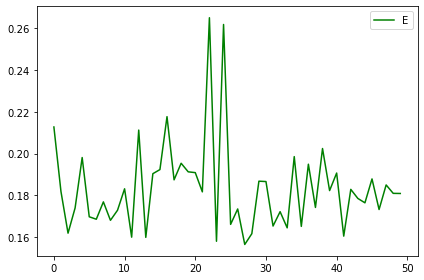

In [15]:
%matplotlib inline
plt.plot(range((len(list_mean_squared_errors))),list_mean_squared_errors,'g')
plt.legend('Errors')
plt.tight_layout()
plt.show()

### Part D: Increase the number of hidden layers

In [16]:
def train_treeHiddenLayers(Nodes,Epochs):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=4)
    model = Sequential()
    n_cols = X.shape[1]
    model.add(Dense(Nodes, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(Nodes,activation='relu'))
    model.add(Dense(Nodes,activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train,y_train,epochs=Epochs)
    y_pred=model.predict(X_test)    
    return mean_squared_error(y_test,y_pred) 

In [17]:
list_mean_squared_errors=[ train_treeHiddenLayers(Nodes=10,Epochs=50) for _ in range(50)]
print(list_mean_squared_errors)
print("Mean of the mean squared errors = ", np.mean( np.array(list_mean_squared_errors) ))
print("The standard deviation of the mean squared errors = ", np.std(np.array(list_mean_squared_errors) ))

Epoch 1/50
721/721 [==============================] - 0s 442us/step - loss: 1.0875
Epoch 2/50
721/721 [==============================] - 0s 30us/step - loss: 0.9589
Epoch 3/50
721/721 [==============================] - 0s 38us/step - loss: 0.8745
Epoch 4/50
721/721 [==============================] - 0s 42us/step - loss: 0.7905
Epoch 5/50
721/721 [==============================] - 0s 34us/step - loss: 0.7011
Epoch 6/50
721/721 [==============================] - 0s 38us/step - loss: 0.6177
Epoch 7/50
721/721 [==============================] - 0s 36us/step - loss: 0.5427
Epoch 8/50
721/721 [==============================] - 0s 37us/step - loss: 0.4795
Epoch 9/50
721/721 [==============================] - 0s 35us/step - loss: 0.4331
Epoch 10/50
721/721 [==============================] - 0s 44us/step - loss: 0.3921
Epoch 11/50
721/721 [==============================] - 0s 34us/step - loss: 0.3646
Epoch 12/50
721/721 [==============================] - 0s 38us/step - loss: 0.3392
Epoch 13/50


721/721 [==============================] - 0s 25us/step - loss: 0.1588
Epoch 50/50
721/721 [==============================] - 0s 41us/step - loss: 0.1561
Epoch 1/50
721/721 [==============================] - 0s 417us/step - loss: 1.3135
Epoch 2/50
721/721 [==============================] - 0s 28us/step - loss: 1.0678
Epoch 3/50
721/721 [==============================] - 0s 26us/step - loss: 0.9427
Epoch 4/50
721/721 [==============================] - 0s 45us/step - loss: 0.8624
Epoch 5/50
721/721 [==============================] - 0s 40us/step - loss: 0.7867
Epoch 6/50
721/721 [==============================] - 0s 14us/step - loss: 0.7077
Epoch 7/50
721/721 [==============================] - 0s 24us/step - loss: 0.6320
Epoch 8/50
721/721 [==============================] - 0s 38us/step - loss: 0.5526
Epoch 9/50
721/721 [==============================] - 0s 41us/step - loss: 0.4880
Epoch 10/50
721/721 [==============================] - 0s 21us/step - loss: 0.4369
Epoch 11/50
721/721 [===

721/721 [==============================] - 0s 41us/step - loss: 0.1381
Epoch 49/50
721/721 [==============================] - 0s 28us/step - loss: 0.1377
Epoch 50/50
721/721 [==============================] - 0s 25us/step - loss: 0.1335
Epoch 1/50
721/721 [==============================] - 0s 421us/step - loss: 0.8254
Epoch 2/50
721/721 [==============================] - 0s 28us/step - loss: 0.7315
Epoch 3/50
721/721 [==============================] - 0s 26us/step - loss: 0.6705
Epoch 4/50
721/721 [==============================] - 0s 38us/step - loss: 0.6319
Epoch 5/50
721/721 [==============================] - 0s 46us/step - loss: 0.5968
Epoch 6/50
721/721 [==============================] - 0s 31us/step - loss: 0.5678
Epoch 7/50
721/721 [==============================] - 0s 28us/step - loss: 0.5409
Epoch 8/50
721/721 [==============================] - 0s 36us/step - loss: 0.5171
Epoch 9/50
721/721 [==============================] - 0s 44us/step - loss: 0.4957
Epoch 10/50
721/721 [===

721/721 [==============================] - 0s 42us/step - loss: 0.1721
Epoch 48/50
721/721 [==============================] - 0s 39us/step - loss: 0.1701
Epoch 49/50
721/721 [==============================] - 0s 27us/step - loss: 0.1694
Epoch 50/50
721/721 [==============================] - 0s 22us/step - loss: 0.1678
Epoch 1/50
721/721 [==============================] - 0s 629us/step - loss: 1.0635
Epoch 2/50
721/721 [==============================] - 0s 29us/step - loss: 0.8176
Epoch 3/50
721/721 [==============================] - 0s 31us/step - loss: 0.7219
Epoch 4/50
721/721 [==============================] - 0s 45us/step - loss: 0.6555
Epoch 5/50
721/721 [==============================] - 0s 34us/step - loss: 0.5963
Epoch 6/50
721/721 [==============================] - 0s 36us/step - loss: 0.5342
Epoch 7/50
721/721 [==============================] - 0s 21us/step - loss: 0.4752
Epoch 8/50
721/721 [==============================] - 0s 38us/step - loss: 0.4302
Epoch 9/50
721/721 [===

721/721 [==============================] - 0s 29us/step - loss: 0.1448
Epoch 47/50
721/721 [==============================] - 0s 31us/step - loss: 0.1421
Epoch 48/50
721/721 [==============================] - 0s 12us/step - loss: 0.1421
Epoch 49/50
721/721 [==============================] - 0s 39us/step - loss: 0.1401
Epoch 50/50
721/721 [==============================] - 0s 41us/step - loss: 0.1392
Epoch 1/50
721/721 [==============================] - 0s 462us/step - loss: 1.0426
Epoch 2/50
721/721 [==============================] - 0s 32us/step - loss: 0.8976
Epoch 3/50
721/721 [==============================] - 0s 32us/step - loss: 0.8113
Epoch 4/50
721/721 [==============================] - 0s 35us/step - loss: 0.7338
Epoch 5/50
721/721 [==============================] - 0s 31us/step - loss: 0.6584
Epoch 6/50
721/721 [==============================] - 0s 65us/step - loss: 0.5854
Epoch 7/50
721/721 [==============================] - 0s 47us/step - loss: 0.5211
Epoch 8/50
721/721 [==

721/721 [==============================] - 0s 37us/step - loss: 0.1387
Epoch 46/50
721/721 [==============================] - 0s 34us/step - loss: 0.1370
Epoch 47/50
721/721 [==============================] - 0s 17us/step - loss: 0.1356
Epoch 48/50
721/721 [==============================] - 0s 42us/step - loss: 0.1334
Epoch 49/50
721/721 [==============================] - 0s 46us/step - loss: 0.1329
Epoch 50/50
721/721 [==============================] - 0s 52us/step - loss: 0.1318
Epoch 1/50
721/721 [==============================] - 0s 680us/step - loss: 1.3766
Epoch 2/50
721/721 [==============================] - 0s 58us/step - loss: 1.0960
Epoch 3/50
721/721 [==============================] - 0s 29us/step - loss: 0.9917
Epoch 4/50
721/721 [==============================] - 0s 53us/step - loss: 0.9431
Epoch 5/50
721/721 [==============================] - 0s 27us/step - loss: 0.8993
Epoch 6/50
721/721 [==============================] - 0s 58us/step - loss: 0.8542
Epoch 7/50
721/721 [=

721/721 [==============================] - 0s 42us/step - loss: 0.1655
Epoch 44/50
721/721 [==============================] - 0s 31us/step - loss: 0.1629
Epoch 45/50
721/721 [==============================] - 0s 20us/step - loss: 0.1608
Epoch 46/50
721/721 [==============================] - 0s 28us/step - loss: 0.1587
Epoch 47/50
721/721 [==============================] - 0s 28us/step - loss: 0.1550
Epoch 48/50
721/721 [==============================] - 0s 33us/step - loss: 0.1536
Epoch 49/50
721/721 [==============================] - 0s 38us/step - loss: 0.1541
Epoch 50/50
721/721 [==============================] - 0s 43us/step - loss: 0.1489
Epoch 1/50
721/721 [==============================] - 0s 416us/step - loss: 0.9874
Epoch 2/50
721/721 [==============================] - 0s 36us/step - loss: 0.8354
Epoch 3/50
721/721 [==============================] - 0s 37us/step - loss: 0.7671
Epoch 4/50
721/721 [==============================] - 0s 25us/step - loss: 0.7099
Epoch 5/50
721/721 

721/721 [==============================] - 0s 31us/step - loss: 0.1731
Epoch 43/50
721/721 [==============================] - 0s 41us/step - loss: 0.1697
Epoch 44/50
721/721 [==============================] - 0s 20us/step - loss: 0.1669
Epoch 45/50
721/721 [==============================] - 0s 42us/step - loss: 0.1645
Epoch 46/50
721/721 [==============================] - 0s 30us/step - loss: 0.1613
Epoch 47/50
721/721 [==============================] - 0s 39us/step - loss: 0.1589
Epoch 48/50
721/721 [==============================] - 0s 41us/step - loss: 0.1570
Epoch 49/50
721/721 [==============================] - 0s 43us/step - loss: 0.1569
Epoch 50/50
721/721 [==============================] - 0s 17us/step - loss: 0.1538
Epoch 1/50
721/721 [==============================] - 0s 436us/step - loss: 1.0507
Epoch 2/50
721/721 [==============================] - 0s 38us/step - loss: 0.9053
Epoch 3/50
721/721 [==============================] - 0s 34us/step - loss: 0.8028
Epoch 4/50
721/721

721/721 [==============================] - 0s 30us/step - loss: 0.1583
Epoch 42/50
721/721 [==============================] - 0s 37us/step - loss: 0.1552
Epoch 43/50
721/721 [==============================] - 0s 18us/step - loss: 0.1531
Epoch 44/50
721/721 [==============================] - 0s 35us/step - loss: 0.1510
Epoch 45/50
721/721 [==============================] - 0s 31us/step - loss: 0.1484
Epoch 46/50
721/721 [==============================] - 0s 42us/step - loss: 0.1455
Epoch 47/50
721/721 [==============================] - 0s 37us/step - loss: 0.1429
Epoch 48/50
721/721 [==============================] - 0s 26us/step - loss: 0.1428
Epoch 49/50
721/721 [==============================] - 0s 33us/step - loss: 0.1396
Epoch 50/50
721/721 [==============================] - 0s 32us/step - loss: 0.1388
Epoch 1/50
721/721 [==============================] - 0s 478us/step - loss: 0.8286
Epoch 2/50
721/721 [==============================] - 0s 29us/step - loss: 0.7273
Epoch 3/50
721/72

721/721 [==============================] - 0s 37us/step - loss: 0.1878
Epoch 41/50
721/721 [==============================] - 0s 42us/step - loss: 0.1856
Epoch 42/50
721/721 [==============================] - 0s 24us/step - loss: 0.1824
Epoch 43/50
721/721 [==============================] - 0s 27us/step - loss: 0.1788
Epoch 44/50
721/721 [==============================] - 0s 45us/step - loss: 0.1749
Epoch 45/50
721/721 [==============================] - 0s 45us/step - loss: 0.1715
Epoch 46/50
721/721 [==============================] - 0s 32us/step - loss: 0.1695
Epoch 47/50
721/721 [==============================] - 0s 30us/step - loss: 0.1675
Epoch 48/50
721/721 [==============================] - 0s 32us/step - loss: 0.1634
Epoch 49/50
721/721 [==============================] - 0s 37us/step - loss: 0.1595
Epoch 50/50
721/721 [==============================] - 0s 34us/step - loss: 0.1577
Epoch 1/50
721/721 [==============================] - 0s 413us/step - loss: 1.1365
Epoch 2/50
721/7

721/721 [==============================] - 0s 41us/step - loss: 0.1709
Epoch 39/50
721/721 [==============================] - 0s 37us/step - loss: 0.1687
Epoch 40/50
721/721 [==============================] - 0s 29us/step - loss: 0.1670
Epoch 41/50
721/721 [==============================] - 0s 22us/step - loss: 0.1636
Epoch 42/50
721/721 [==============================] - 0s 36us/step - loss: 0.1611
Epoch 43/50
721/721 [==============================] - 0s 42us/step - loss: 0.1598
Epoch 44/50
721/721 [==============================] - 0s 21us/step - loss: 0.1552
Epoch 45/50
721/721 [==============================] - 0s 43us/step - loss: 0.1522
Epoch 46/50
721/721 [==============================] - 0s 24us/step - loss: 0.1498
Epoch 47/50
721/721 [==============================] - 0s 41us/step - loss: 0.1453
Epoch 48/50
721/721 [==============================] - 0s 21us/step - loss: 0.1419
Epoch 49/50
721/721 [==============================] - 0s 39us/step - loss: 0.1382
Epoch 50/50
721/

721/721 [==============================] - 0s 39us/step - loss: 0.2390
Epoch 38/50
721/721 [==============================] - 0s 35us/step - loss: 0.2349
Epoch 39/50
721/721 [==============================] - 0s 13us/step - loss: 0.2301
Epoch 40/50
721/721 [==============================] - 0s 22us/step - loss: 0.2255
Epoch 41/50
721/721 [==============================] - 0s 28us/step - loss: 0.2221
Epoch 42/50
721/721 [==============================] - 0s 17us/step - loss: 0.2193
Epoch 43/50
721/721 [==============================] - 0s 33us/step - loss: 0.2149
Epoch 44/50
721/721 [==============================] - 0s 61us/step - loss: 0.2115
Epoch 45/50
721/721 [==============================] - 0s 13us/step - loss: 0.2083
Epoch 46/50
721/721 [==============================] - ETA: 0s - loss: 0.248 - 0s 50us/step - loss: 0.2043
Epoch 47/50
721/721 [==============================] - 0s 29us/step - loss: 0.2010
Epoch 48/50
721/721 [==============================] - 0s 28us/step - loss:

721/721 [==============================] - 0s 33us/step - loss: 0.1944
Epoch 36/50
721/721 [==============================] - 0s 31us/step - loss: 0.1939
Epoch 37/50
721/721 [==============================] - 0s 20us/step - loss: 0.1900
Epoch 38/50
721/721 [==============================] - 0s 35us/step - loss: 0.1887
Epoch 39/50
721/721 [==============================] - 0s 36us/step - loss: 0.1875
Epoch 40/50
721/721 [==============================] - 0s 29us/step - loss: 0.1854
Epoch 41/50
721/721 [==============================] - 0s 29us/step - loss: 0.1829
Epoch 42/50
721/721 [==============================] - 0s 13us/step - loss: 0.1814
Epoch 43/50
721/721 [==============================] - 0s 47us/step - loss: 0.1831
Epoch 44/50
721/721 [==============================] - 0s 29us/step - loss: 0.1803
Epoch 45/50
721/721 [==============================] - 0s 35us/step - loss: 0.1774
Epoch 46/50
721/721 [==============================] - 0s 36us/step - loss: 0.1770
Epoch 47/50
721/

721/721 [==============================] - 0s 34us/step - loss: 0.1764
Epoch 35/50
721/721 [==============================] - 0s 43us/step - loss: 0.1725
Epoch 36/50
721/721 [==============================] - 0s 28us/step - loss: 0.1724
Epoch 37/50
721/721 [==============================] - 0s 26us/step - loss: 0.1684
Epoch 38/50
721/721 [==============================] - 0s 16us/step - loss: 0.1645
Epoch 39/50
721/721 [==============================] - 0s 41us/step - loss: 0.1626
Epoch 40/50
721/721 [==============================] - 0s 38us/step - loss: 0.1602
Epoch 41/50
721/721 [==============================] - 0s 33us/step - loss: 0.1609
Epoch 42/50
721/721 [==============================] - 0s 50us/step - loss: 0.1611
Epoch 43/50
721/721 [==============================] - 0s 25us/step - loss: 0.1549
Epoch 44/50
721/721 [==============================] - 0s 36us/step - loss: 0.1536
Epoch 45/50
721/721 [==============================] - 0s 32us/step - loss: 0.1515
Epoch 46/50
721/

721/721 [==============================] - 0s 29us/step - loss: 0.1878
Epoch 34/50
721/721 [==============================] - 0s 39us/step - loss: 0.1852
Epoch 35/50
721/721 [==============================] - 0s 16us/step - loss: 0.1835
Epoch 36/50
721/721 [==============================] - 0s 39us/step - loss: 0.1827
Epoch 37/50
721/721 [==============================] - 0s 29us/step - loss: 0.1784
Epoch 38/50
721/721 [==============================] - 0s 28us/step - loss: 0.1766
Epoch 39/50
721/721 [==============================] - 0s 36us/step - loss: 0.1742
Epoch 40/50
721/721 [==============================] - 0s 21us/step - loss: 0.1731
Epoch 41/50
721/721 [==============================] - 0s 37us/step - loss: 0.1701
Epoch 42/50
721/721 [==============================] - 0s 31us/step - loss: 0.1697
Epoch 43/50
721/721 [==============================] - 0s 35us/step - loss: 0.1666
Epoch 44/50
721/721 [==============================] - ETA: 0s - loss: 0.164 - 0s 33us/step - loss:

721/721 [==============================] - 0s 42us/step - loss: 0.2062
Epoch 32/50
721/721 [==============================] - 0s 35us/step - loss: 0.2007
Epoch 33/50
721/721 [==============================] - 0s 16us/step - loss: 0.2004
Epoch 34/50
721/721 [==============================] - 0s 29us/step - loss: 0.1963
Epoch 35/50
721/721 [==============================] - 0s 37us/step - loss: 0.1922
Epoch 36/50
721/721 [==============================] - 0s 36us/step - loss: 0.1931
Epoch 37/50
721/721 [==============================] - 0s 41us/step - loss: 0.1883
Epoch 38/50
721/721 [==============================] - 0s 26us/step - loss: 0.1853
Epoch 39/50
721/721 [==============================] - 0s 46us/step - loss: 0.1832
Epoch 40/50
721/721 [==============================] - 0s 38us/step - loss: 0.1822
Epoch 41/50
721/721 [==============================] - 0s 29us/step - loss: 0.1828
Epoch 42/50
721/721 [==============================] - 0s 29us/step - loss: 0.1777
Epoch 43/50
721/

721/721 [==============================] - 0s 33us/step - loss: 0.2174
Epoch 30/50
721/721 [==============================] - 0s 34us/step - loss: 0.2094
Epoch 31/50
721/721 [==============================] - 0s 22us/step - loss: 0.2058
Epoch 32/50
721/721 [==============================] - 0s 41us/step - loss: 0.2023
Epoch 33/50
721/721 [==============================] - 0s 26us/step - loss: 0.2017
Epoch 34/50
721/721 [==============================] - 0s 34us/step - loss: 0.1982
Epoch 35/50
721/721 [==============================] - 0s 38us/step - loss: 0.1928
Epoch 36/50
721/721 [==============================] - 0s 22us/step - loss: 0.1891
Epoch 37/50
721/721 [==============================] - 0s 34us/step - loss: 0.1876
Epoch 38/50
721/721 [==============================] - 0s 36us/step - loss: 0.1873
Epoch 39/50
721/721 [==============================] - 0s 37us/step - loss: 0.1817
Epoch 40/50
721/721 [==============================] - 0s 20us/step - loss: 0.1815
Epoch 41/50
721/

721/721 [==============================] - 0s 38us/step - loss: 0.2731
Epoch 28/50
721/721 [==============================] - 0s 10us/step - loss: 0.2632
Epoch 29/50
721/721 [==============================] - 0s 26us/step - loss: 0.2538
Epoch 30/50
721/721 [==============================] - 0s 26us/step - loss: 0.2470
Epoch 31/50
721/721 [==============================] - 0s 20us/step - loss: 0.2369
Epoch 32/50
721/721 [==============================] - 0s 30us/step - loss: 0.2290
Epoch 33/50
721/721 [==============================] - 0s 40us/step - loss: 0.2221
Epoch 34/50
721/721 [==============================] - 0s 28us/step - loss: 0.2143
Epoch 35/50
721/721 [==============================] - 0s 41us/step - loss: 0.2063
Epoch 36/50
721/721 [==============================] - 0s 22us/step - loss: 0.2050
Epoch 37/50
721/721 [==============================] - 0s 40us/step - loss: 0.1936
Epoch 38/50
721/721 [==============================] - 0s 21us/step - loss: 0.1878
Epoch 39/50
721/

721/721 [==============================] - 0s 35us/step - loss: 0.2959
Epoch 27/50
721/721 [==============================] - 0s 43us/step - loss: 0.2883
Epoch 28/50
721/721 [==============================] - 0s 17us/step - loss: 0.2806
Epoch 29/50
721/721 [==============================] - 0s 34us/step - loss: 0.2768
Epoch 30/50
721/721 [==============================] - 0s 39us/step - loss: 0.2671
Epoch 31/50
721/721 [==============================] - 0s 29us/step - loss: 0.2624
Epoch 32/50
721/721 [==============================] - 0s 33us/step - loss: 0.2564
Epoch 33/50
721/721 [==============================] - 0s 46us/step - loss: 0.2530
Epoch 34/50
721/721 [==============================] - 0s 20us/step - loss: 0.2477
Epoch 35/50
721/721 [==============================] - 0s 45us/step - loss: 0.2422
Epoch 36/50
721/721 [==============================] - 0s 27us/step - loss: 0.2379
Epoch 37/50
721/721 [==============================] - 0s 30us/step - loss: 0.2366
Epoch 38/50
721/

721/721 [==============================] - 0s 32us/step - loss: 0.2145
Epoch 26/50
721/721 [==============================] - 0s 40us/step - loss: 0.2051
Epoch 27/50
721/721 [==============================] - 0s 22us/step - loss: 0.1952
Epoch 28/50
721/721 [==============================] - 0s 29us/step - loss: 0.1882
Epoch 29/50
721/721 [==============================] - 0s 37us/step - loss: 0.1805
Epoch 30/50
721/721 [==============================] - 0s 23us/step - loss: 0.1742
Epoch 31/50
721/721 [==============================] - 0s 49us/step - loss: 0.1698
Epoch 32/50
721/721 [==============================] - 0s 21us/step - loss: 0.1635
Epoch 33/50
721/721 [==============================] - 0s 41us/step - loss: 0.1588
Epoch 34/50
721/721 [==============================] - 0s 23us/step - loss: 0.1549
Epoch 35/50
721/721 [==============================] - 0s 32us/step - loss: 0.1495
Epoch 36/50
721/721 [==============================] - 0s 34us/step - loss: 0.1456
Epoch 37/50
721/

721/721 [==============================] - 0s 32us/step - loss: 0.2509
Epoch 24/50
721/721 [==============================] - 0s 38us/step - loss: 0.2443
Epoch 25/50
721/721 [==============================] - 0s 30us/step - loss: 0.2388
Epoch 26/50
721/721 [==============================] - 0s 25us/step - loss: 0.2320
Epoch 27/50
721/721 [==============================] - 0s 40us/step - loss: 0.2257
Epoch 28/50
721/721 [==============================] - 0s 23us/step - loss: 0.2210
Epoch 29/50
721/721 [==============================] - 0s 41us/step - loss: 0.2147
Epoch 30/50
721/721 [==============================] - 0s 19us/step - loss: 0.2084
Epoch 31/50
721/721 [==============================] - ETA: 0s - loss: 0.108 - 0s 50us/step - loss: 0.2023
Epoch 32/50
721/721 [==============================] - 0s 18us/step - loss: 0.1996
Epoch 33/50
721/721 [==============================] - 0s 35us/step - loss: 0.1923
Epoch 34/50
721/721 [==============================] - 0s 41us/step - loss:

721/721 [==============================] - 0s 27us/step - loss: 0.2215
Epoch 22/50
721/721 [==============================] - 0s 35us/step - loss: 0.2147
Epoch 23/50
721/721 [==============================] - 0s 16us/step - loss: 0.2075
Epoch 24/50
721/721 [==============================] - 0s 45us/step - loss: 0.1986
Epoch 25/50
721/721 [==============================] - 0s 24us/step - loss: 0.1916
Epoch 26/50
721/721 [==============================] - 0s 41us/step - loss: 0.1839
Epoch 27/50
721/721 [==============================] - 0s 22us/step - loss: 0.1766
Epoch 28/50
721/721 [==============================] - 0s 28us/step - loss: 0.1731
Epoch 29/50
721/721 [==============================] - 0s 45us/step - loss: 0.1656
Epoch 30/50
721/721 [==============================] - 0s 25us/step - loss: 0.1610
Epoch 31/50
721/721 [==============================] - 0s 44us/step - loss: 0.1565
Epoch 32/50
721/721 [==============================] - 0s 35us/step - loss: 0.1529
Epoch 33/50
721/

721/721 [==============================] - 0s 39us/step - loss: 0.2895
Epoch 20/50
721/721 [==============================] - 0s 44us/step - loss: 0.2761
Epoch 21/50
721/721 [==============================] - 0s 25us/step - loss: 0.2627
Epoch 22/50
721/721 [==============================] - 0s 25us/step - loss: 0.2508
Epoch 23/50
721/721 [==============================] - 0s 35us/step - loss: 0.2411
Epoch 24/50
721/721 [==============================] - 0s 44us/step - loss: 0.2312
Epoch 25/50
721/721 [==============================] - 0s 35us/step - loss: 0.2235
Epoch 26/50
721/721 [==============================] - 0s 26us/step - loss: 0.2169
Epoch 27/50
721/721 [==============================] - 0s 51us/step - loss: 0.2100
Epoch 28/50
721/721 [==============================] - 0s 24us/step - loss: 0.2039
Epoch 29/50
721/721 [==============================] - 0s 38us/step - loss: 0.1963
Epoch 30/50
721/721 [==============================] - 0s 34us/step - loss: 0.1919
Epoch 31/50
721/

721/721 [==============================] - 0s 31us/step - loss: 0.4030
Epoch 19/50
721/721 [==============================] - 0s 37us/step - loss: 0.3777
Epoch 20/50
721/721 [==============================] - 0s 15us/step - loss: 0.3531
Epoch 21/50
721/721 [==============================] - 0s 42us/step - loss: 0.3338
Epoch 22/50
721/721 [==============================] - 0s 42us/step - loss: 0.3138
Epoch 23/50
721/721 [==============================] - 0s 35us/step - loss: 0.2973
Epoch 24/50
721/721 [==============================] - 0s 36us/step - loss: 0.2812
Epoch 25/50
721/721 [==============================] - 0s 27us/step - loss: 0.2663
Epoch 26/50
721/721 [==============================] - 0s 41us/step - loss: 0.2538
Epoch 27/50
721/721 [==============================] - 0s 41us/step - loss: 0.2423
Epoch 28/50
721/721 [==============================] - 0s 30us/step - loss: 0.2330
Epoch 29/50
721/721 [==============================] - 0s 27us/step - loss: 0.2211
Epoch 30/50
721/

721/721 [==============================] - 0s 37us/step - loss: 0.3160
Epoch 17/50
721/721 [==============================] - 0s 47us/step - loss: 0.3042
Epoch 18/50
721/721 [==============================] - 0s 40us/step - loss: 0.2987
Epoch 19/50
721/721 [==============================] - 0s 19us/step - loss: 0.2916
Epoch 20/50
721/721 [==============================] - 0s 53us/step - loss: 0.2847
Epoch 21/50
721/721 [==============================] - 0s 27us/step - loss: 0.2779
Epoch 22/50
721/721 [==============================] - 0s 22us/step - loss: 0.2726
Epoch 23/50
721/721 [==============================] - 0s 19us/step - loss: 0.2674
Epoch 24/50
721/721 [==============================] - 0s 49us/step - loss: 0.2608
Epoch 25/50
721/721 [==============================] - 0s 37us/step - loss: 0.2542
Epoch 26/50
721/721 [==============================] - 0s 23us/step - loss: 0.2515
Epoch 27/50
721/721 [==============================] - 0s 29us/step - loss: 0.2456
Epoch 28/50
721/

721/721 [==============================] - 0s 45us/step - loss: 0.4377
Epoch 15/50
721/721 [==============================] - 0s 35us/step - loss: 0.4177
Epoch 16/50
721/721 [==============================] - 0s 19us/step - loss: 0.4004
Epoch 17/50
721/721 [==============================] - 0s 42us/step - loss: 0.3827
Epoch 18/50
721/721 [==============================] - 0s 25us/step - loss: 0.3674
Epoch 19/50
721/721 [==============================] - 0s 24us/step - loss: 0.3520
Epoch 20/50
721/721 [==============================] - 0s 34us/step - loss: 0.3391
Epoch 21/50
721/721 [==============================] - 0s 29us/step - loss: 0.3257
Epoch 22/50
721/721 [==============================] - 0s 52us/step - loss: 0.3140
Epoch 23/50
721/721 [==============================] - 0s 25us/step - loss: 0.3009
Epoch 24/50
721/721 [==============================] - 0s 44us/step - loss: 0.2927
Epoch 25/50
721/721 [==============================] - 0s 24us/step - loss: 0.2870
Epoch 26/50
721/

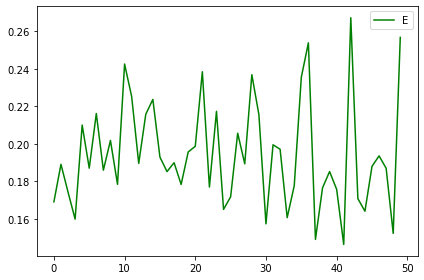

In [18]:
%matplotlib inline
plt.plot(range((len(list_mean_squared_errors))),list_mean_squared_errors,'g')
plt.legend('Errors')
plt.tight_layout()
plt.show()